For a start to visualizing the data and understanding the attributes we imported pandas and matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
%matplotlib inline

C:\Users\a_rah\AppData\Local\Temp\ipykernel_8220\1899848097.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


we then put the given train csv into a pandas dataframe

In [2]:
df = pd.read_csv("application_train.csv")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option("display.max_seq_items",None)

In [3]:
df.loc[df['FLAG_OWN_CAR'] == 'N', 'OWN_CAR_AGE'] = 0

In [4]:
df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].median())
df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean())
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].mode()[0])
df['EXT_SOURCE_1'] = df['EXT_SOURCE_1'].fillna(df['EXT_SOURCE_1'].mean())
df['EXT_SOURCE_2'] = df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean())
df['EXT_SOURCE_3'] = df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean())
df['AMT_REQ_CREDIT_BUREAU_HOUR'] = df['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(df['AMT_REQ_CREDIT_BUREAU_HOUR'].mean())
df['AMT_REQ_CREDIT_BUREAU_DAY'] = df['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(df['AMT_REQ_CREDIT_BUREAU_DAY'].mean())
df['AMT_REQ_CREDIT_BUREAU_WEEK'] = df['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(df['AMT_REQ_CREDIT_BUREAU_WEEK'].mean())
df['AMT_REQ_CREDIT_BUREAU_MON'] = df['AMT_REQ_CREDIT_BUREAU_MON'].fillna(df['AMT_REQ_CREDIT_BUREAU_MON'].mean())
df['AMT_REQ_CREDIT_BUREAU_QRT'] = df['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(df['AMT_REQ_CREDIT_BUREAU_QRT'].mean())
df['AMT_REQ_CREDIT_BUREAU_YEAR'] = df['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(df['AMT_REQ_CREDIT_BUREAU_YEAR'].mean())
df['OBS_30_CNT_SOCIAL_CIRCLE'] = df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median())
df['OBS_60_CNT_SOCIAL_CIRCLE'] = df['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_60_CNT_SOCIAL_CIRCLE'].median())
df['DEF_60_CNT_SOCIAL_CIRCLE'] = df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_60_CNT_SOCIAL_CIRCLE'].median())
df['DEF_30_CNT_SOCIAL_CIRCLE'] = df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_30_CNT_SOCIAL_CIRCLE'].median())

In [5]:
for i in df.columns:
       if i[-4:-1] == "_AV":
              df[i] = df[i].fillna(df[i].mean())
       if i[-4:-1] == "MOD":
              df[i] = df[i].fillna(df[i].mode()[0])
       if i[-4:-1] == "MED":
              df[i] = df[i].fillna(df[i].median())

In [6]:
df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].fillna(0)
df['NAME_TYPE_SUITE'] = df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0])
df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna("Unknown")
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].fillna(df['DAYS_LAST_PHONE_CHANGE'].mode()[0])

useless attribute drop

In [7]:
df = df.drop(columns=['SK_ID_CURR'])

In [8]:
df.shape

(307511, 121)

In [9]:
for i in df.columns:
    if not pd.api.types.is_numeric_dtype(df[i]):  # Check for non-numeric type
        df[i] = LabelEncoder().fit_transform(df[i])

In [10]:
# df['INCOME_BIN'] = pd.qcut(df['AMT_INCOME_TOTAL'], q=4, labels=False)
# df['GOODS_PRICE_BIN'] = pd.qcut(df['AMT_GOODS_PRICE'], q=4, labels=False)

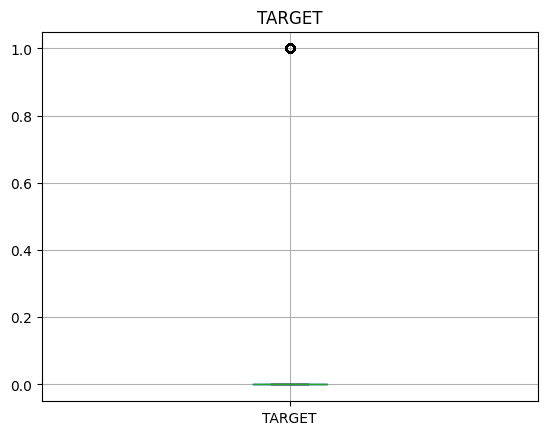

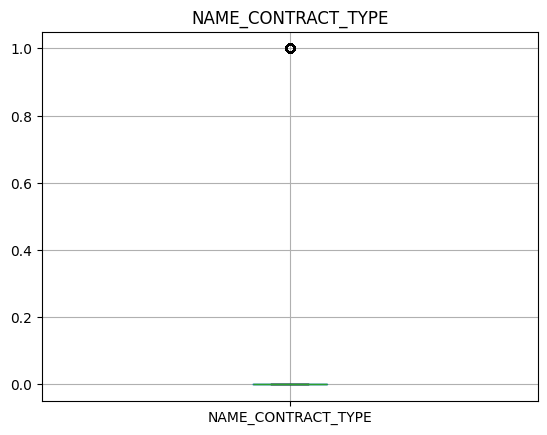

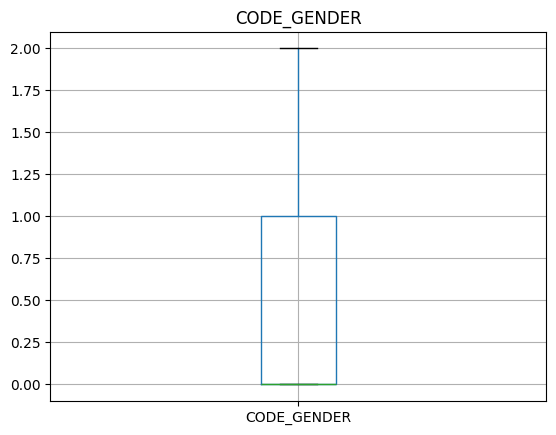

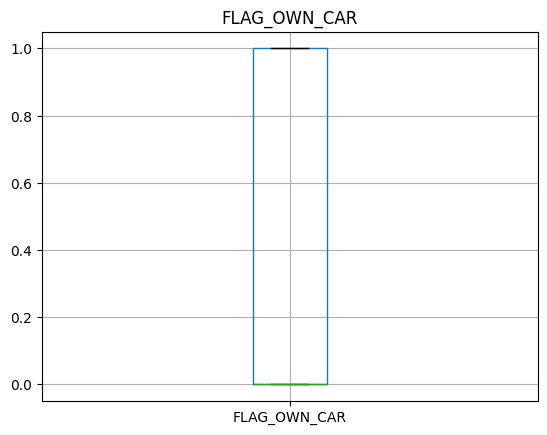

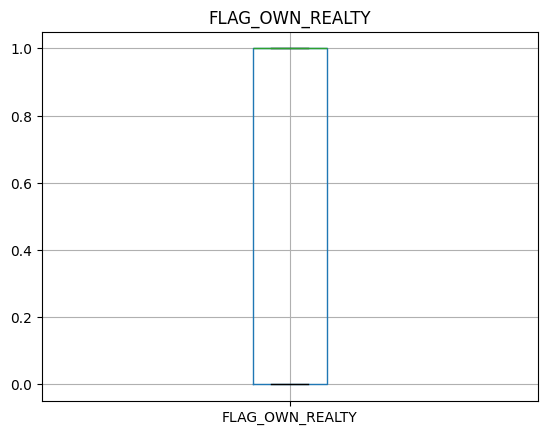

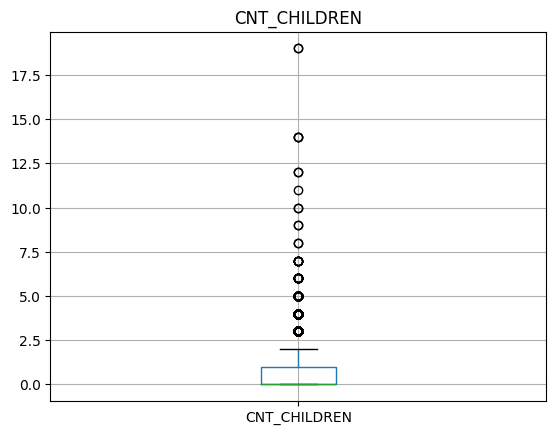

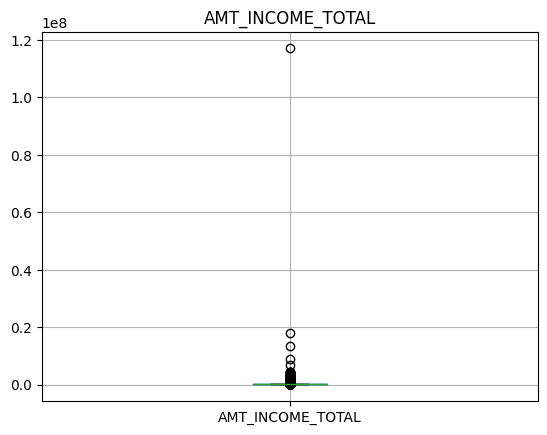

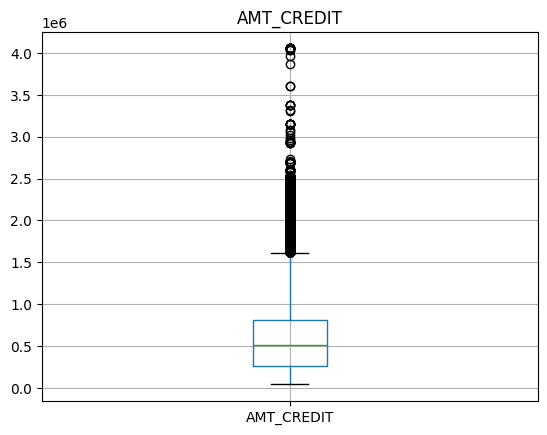

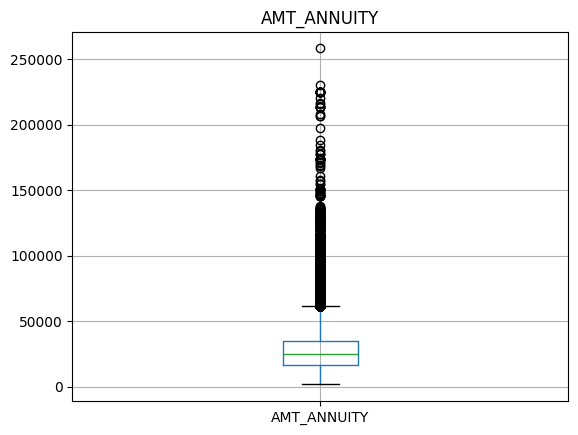

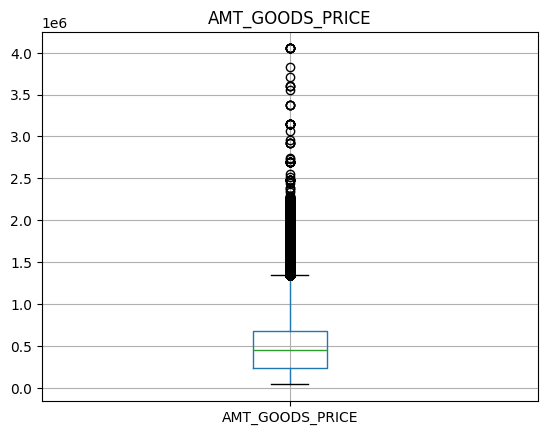

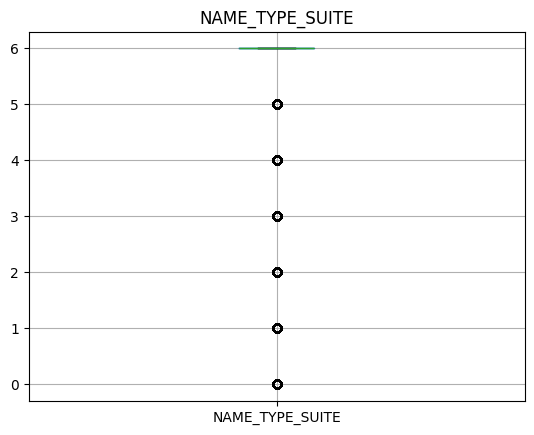

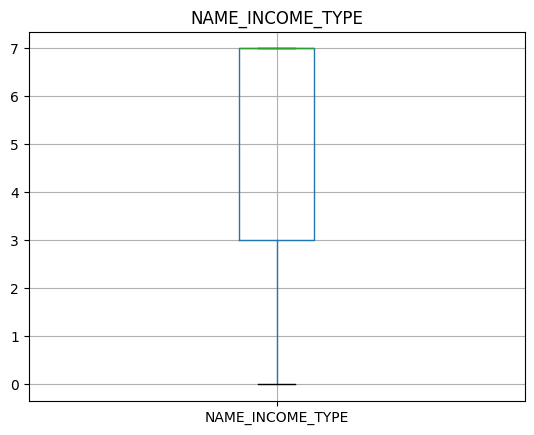

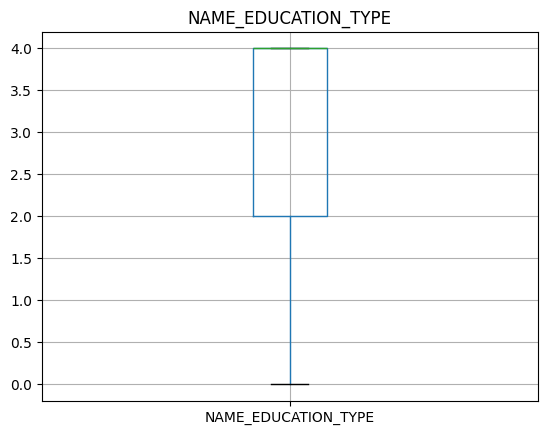

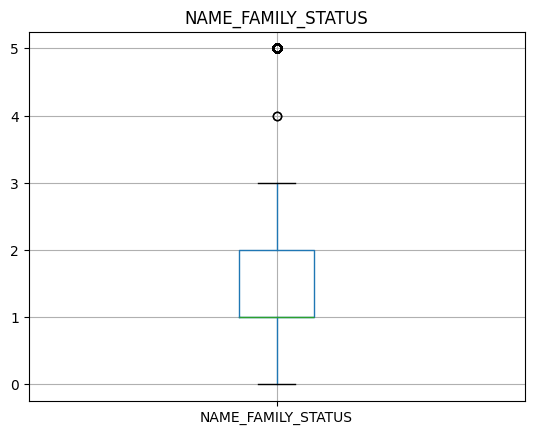

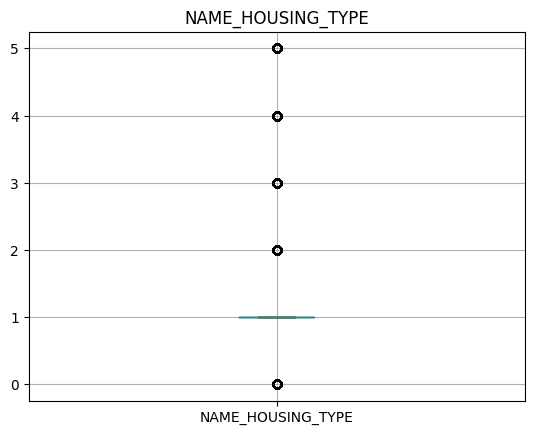

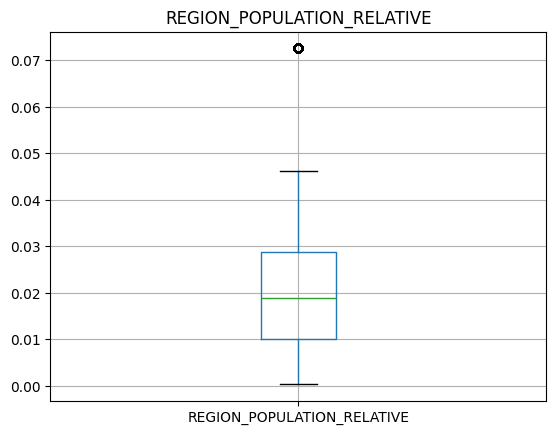

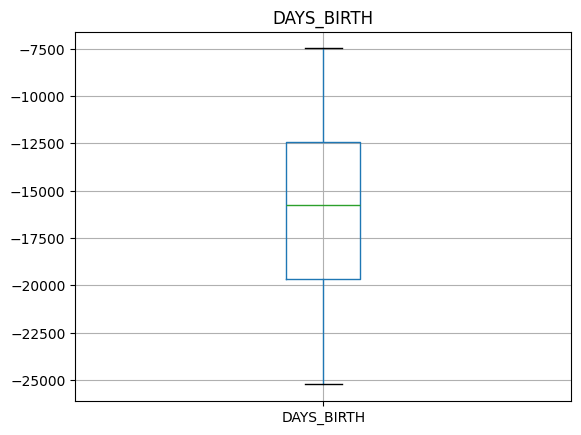

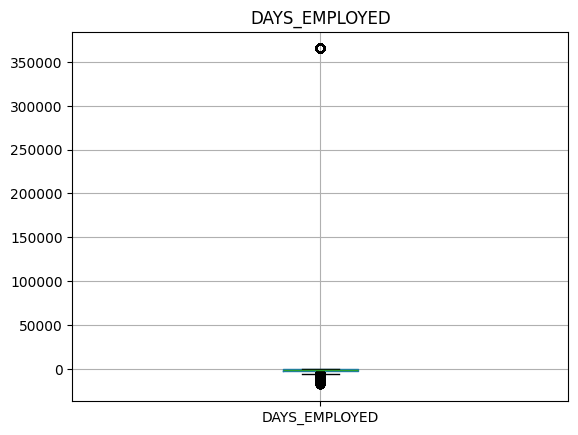

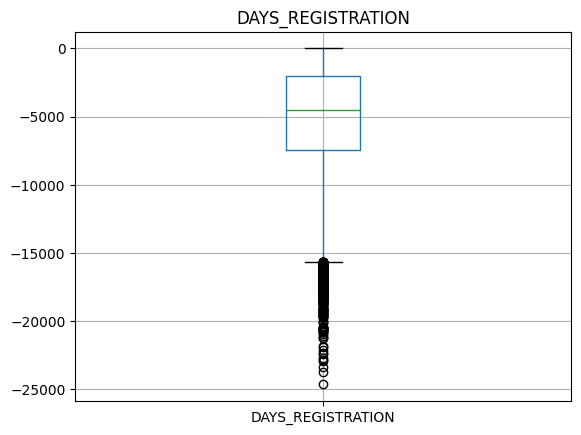

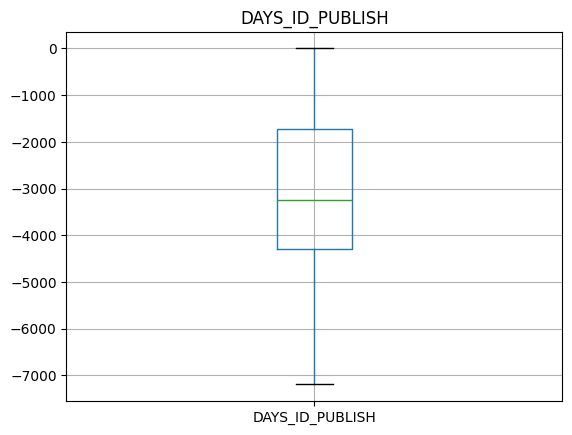

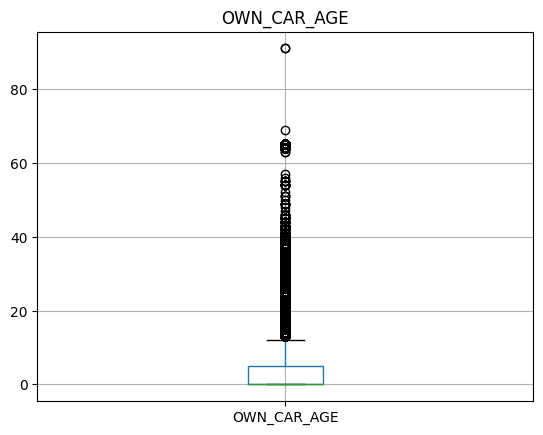

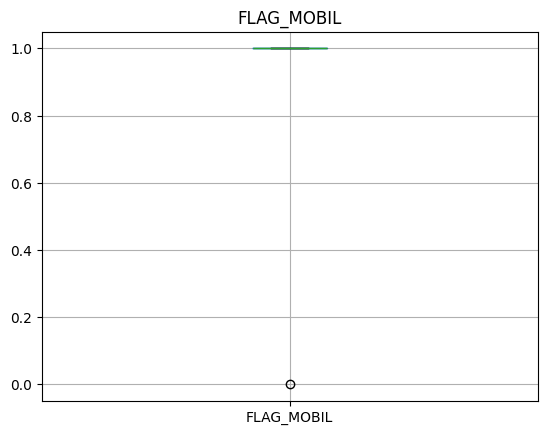

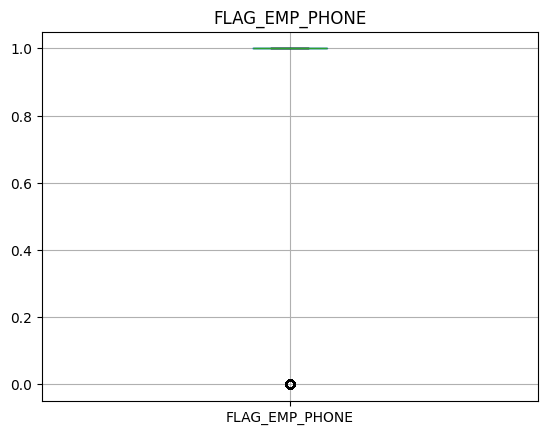

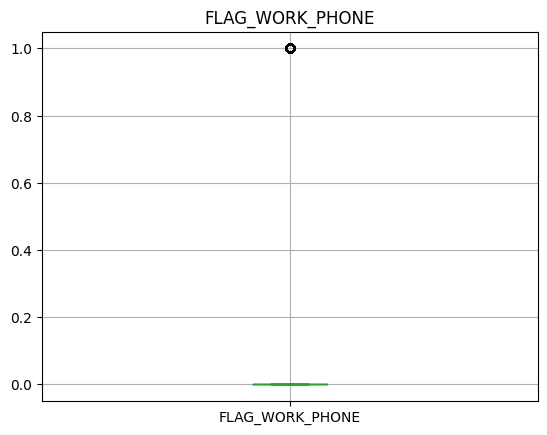

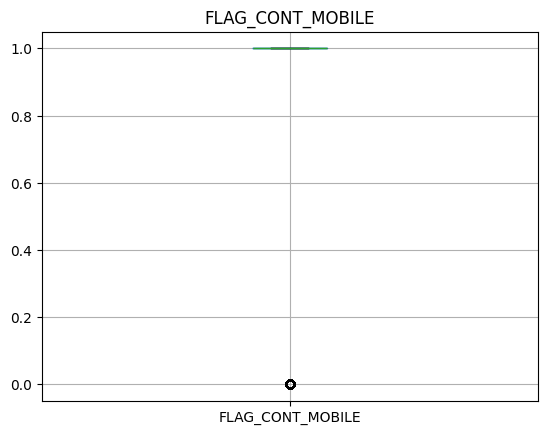

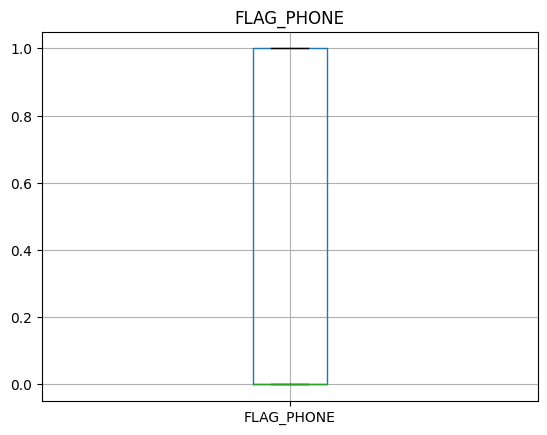

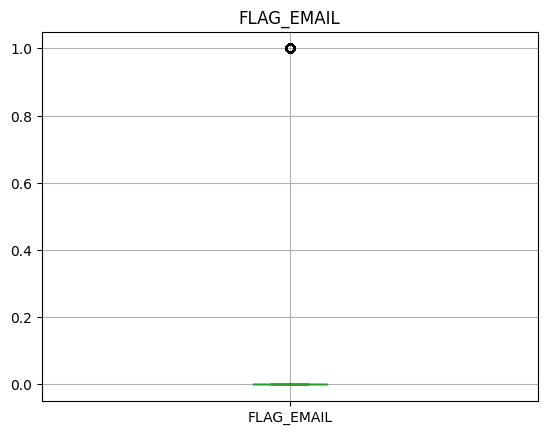

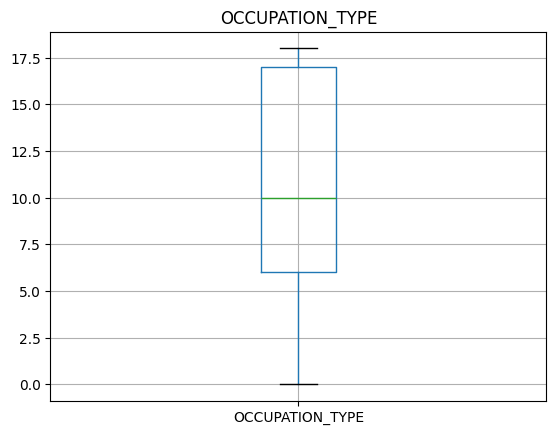

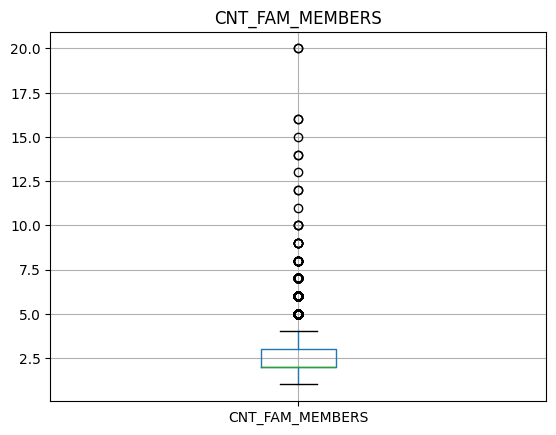

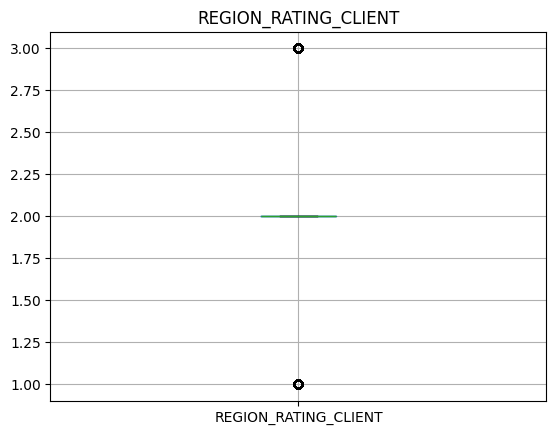

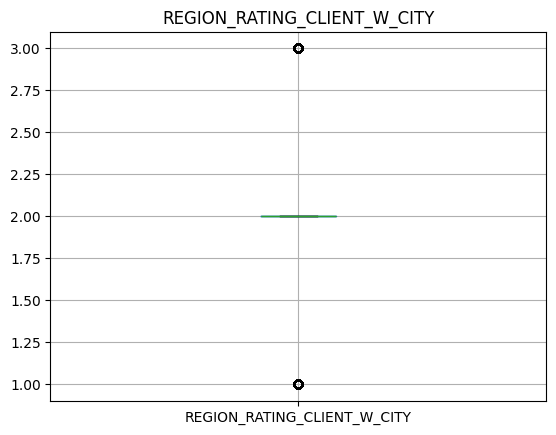

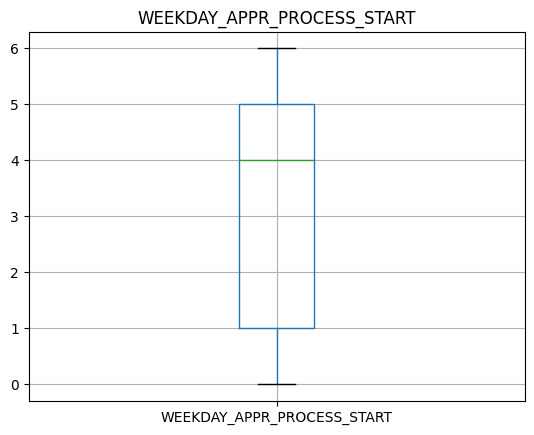

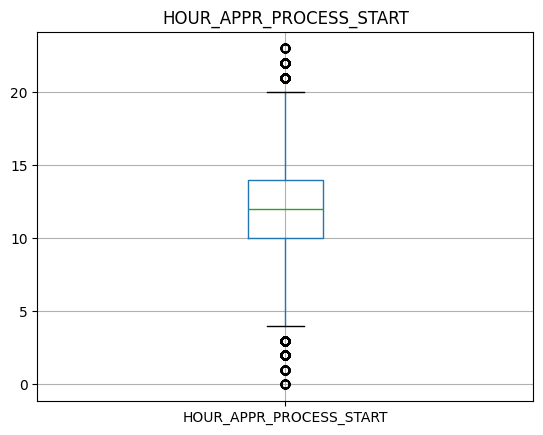

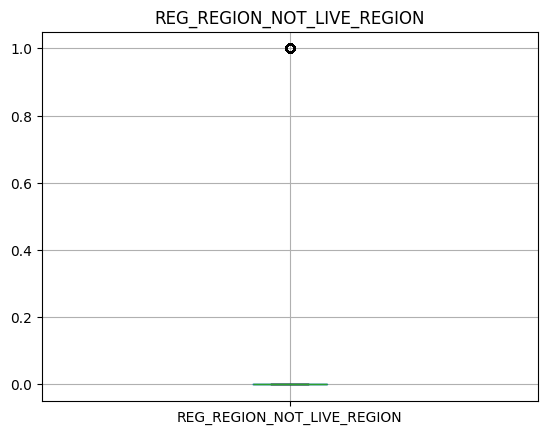

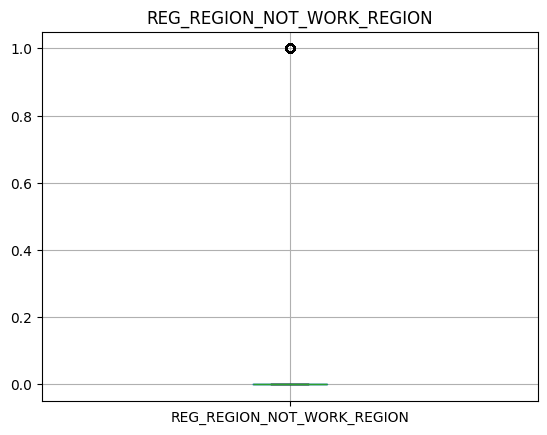

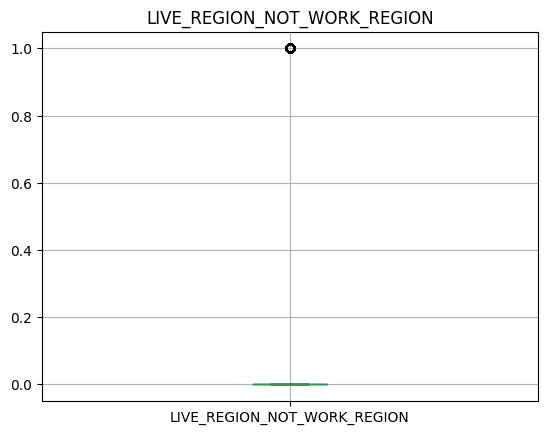

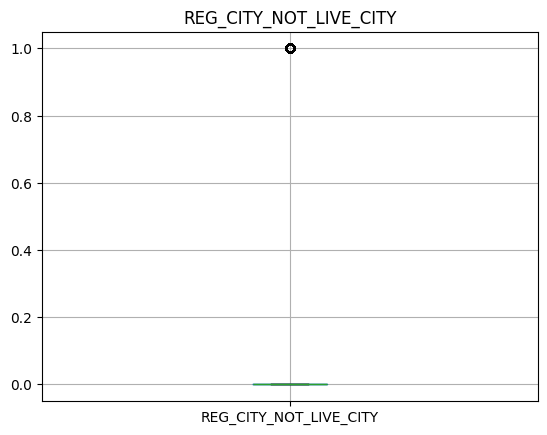

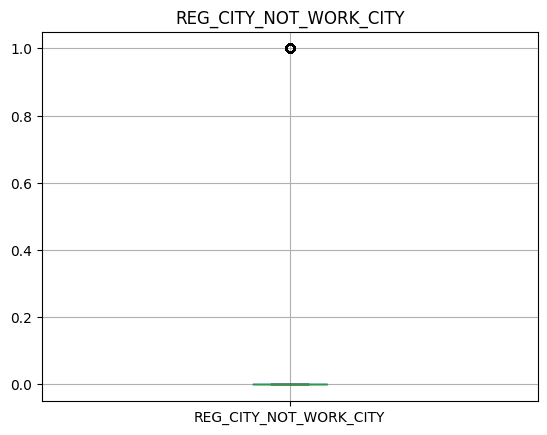

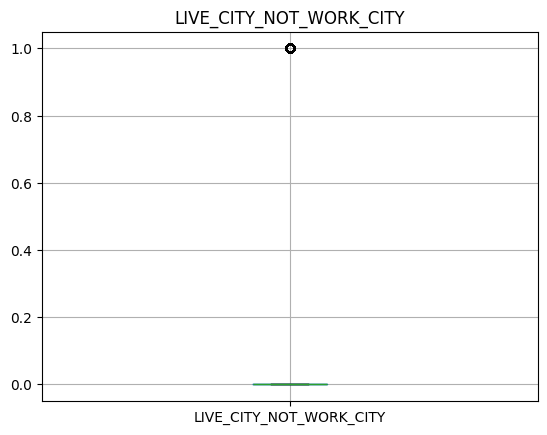

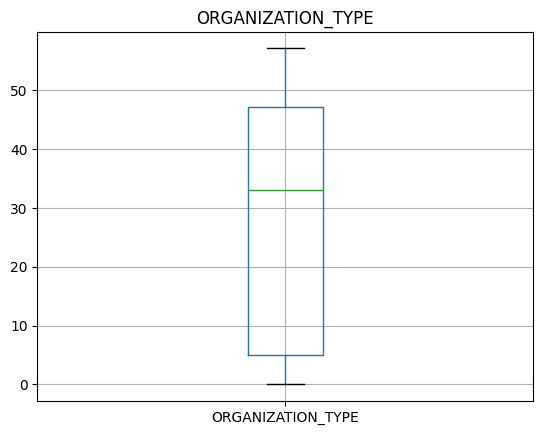

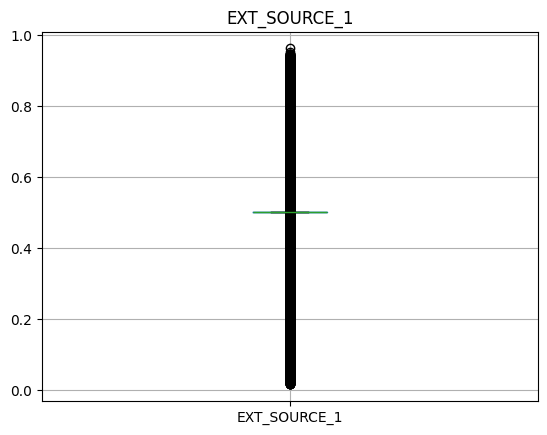

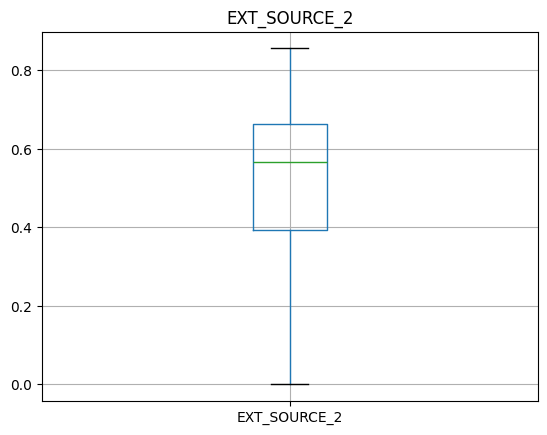

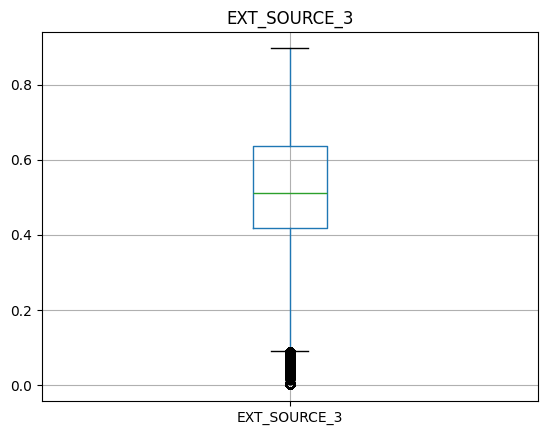

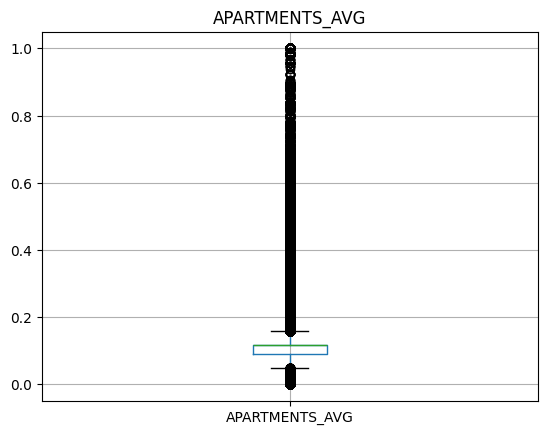

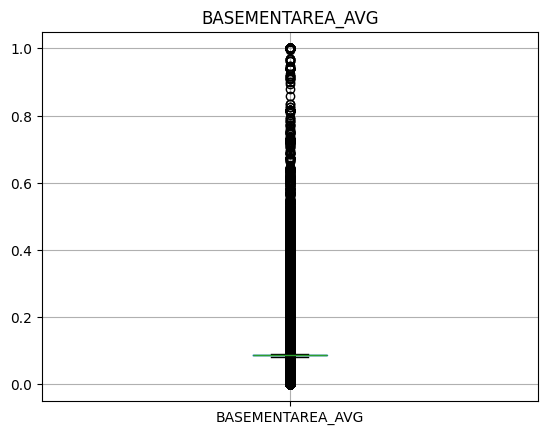

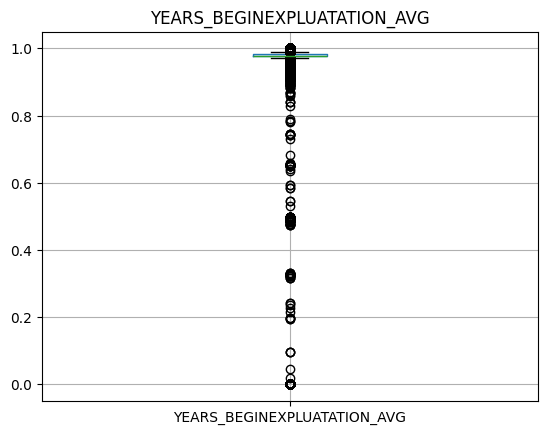

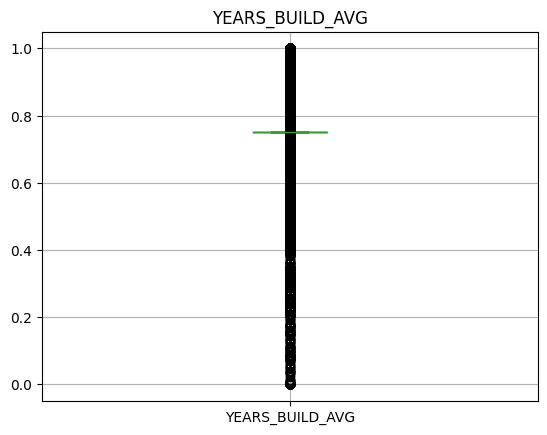

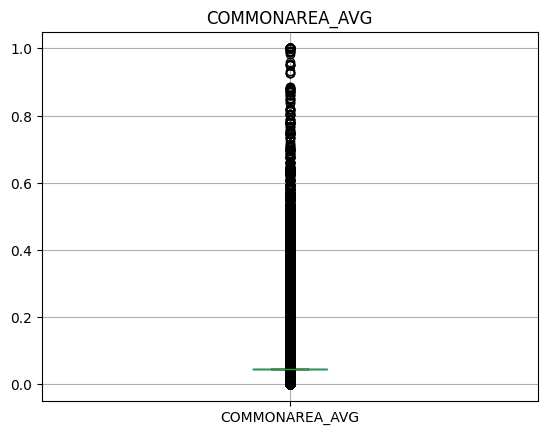

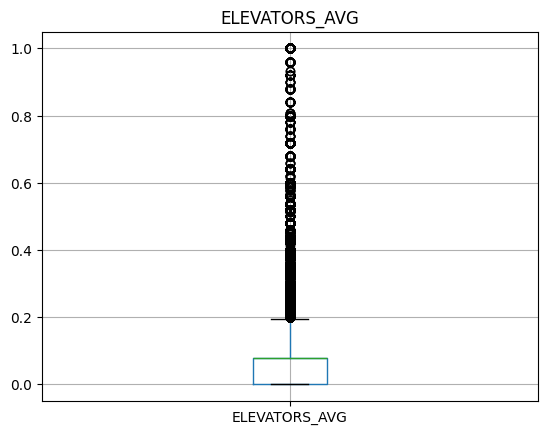

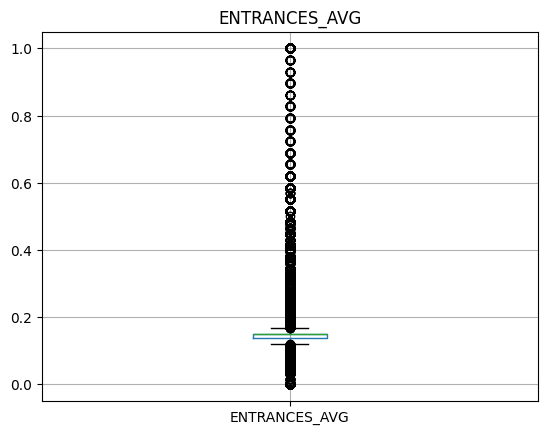

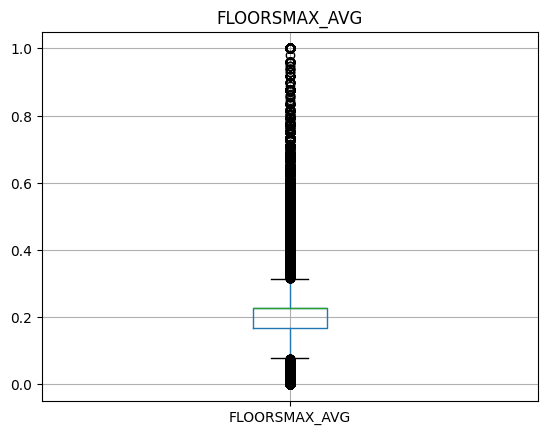

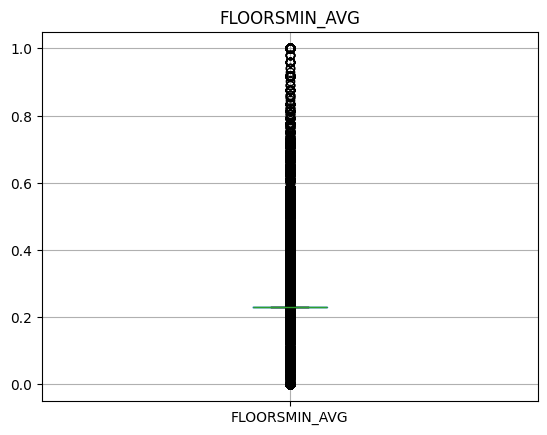

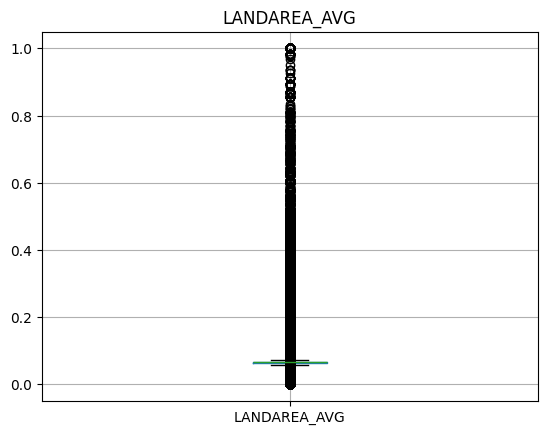

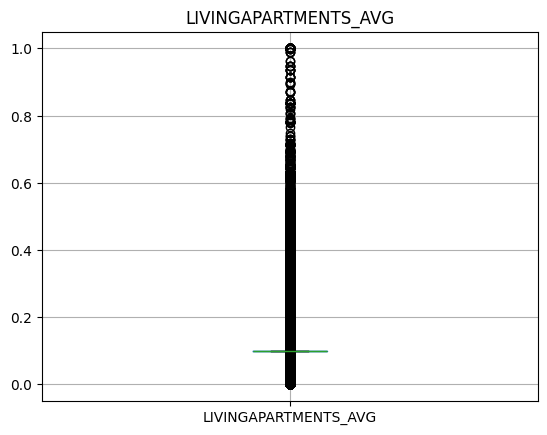

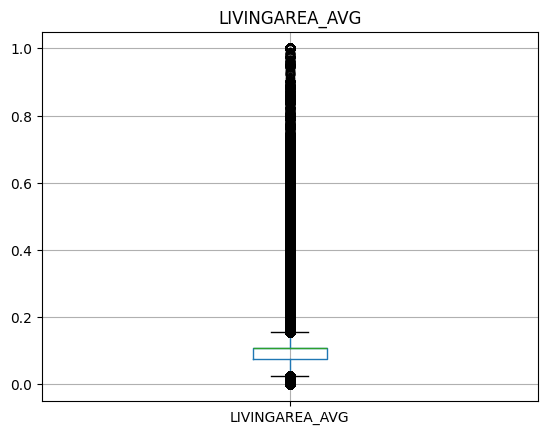

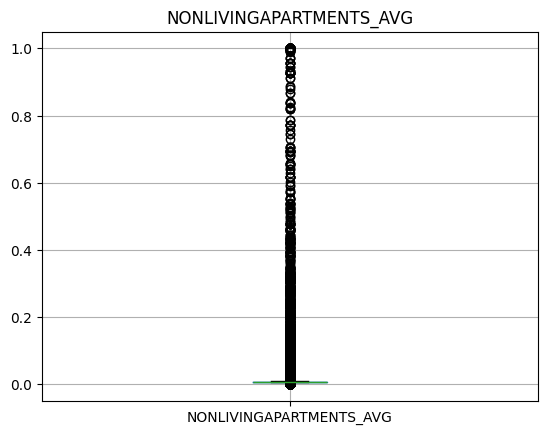

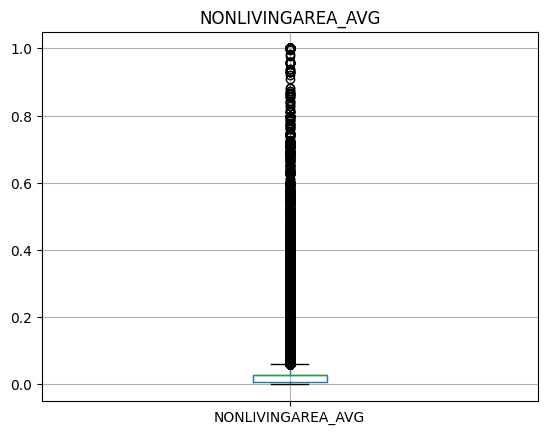

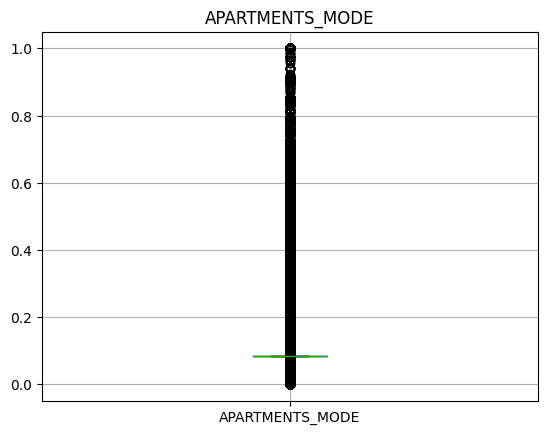

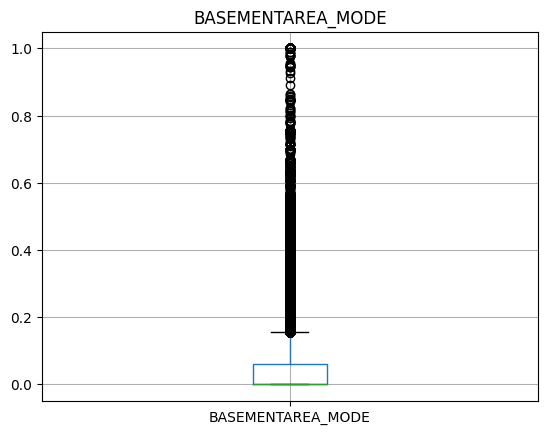

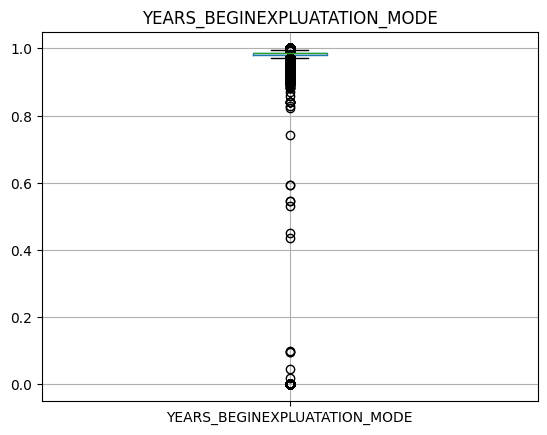

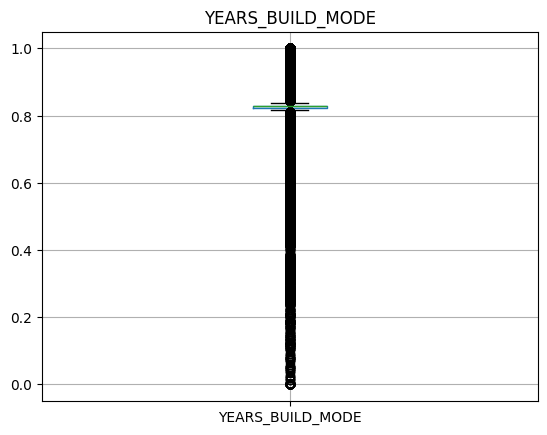

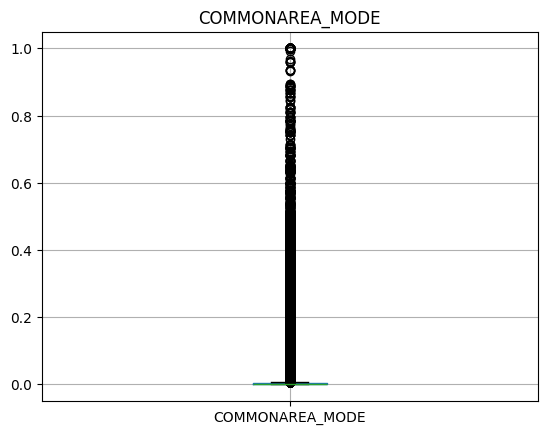

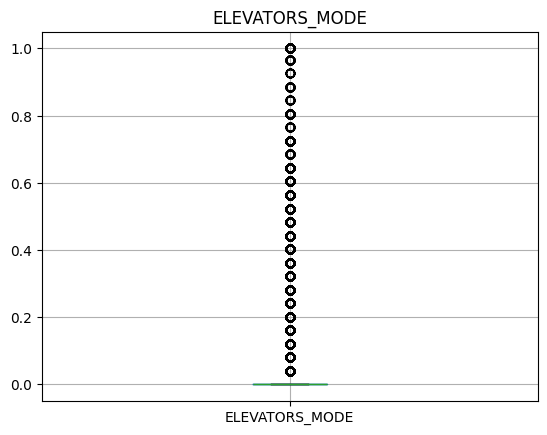

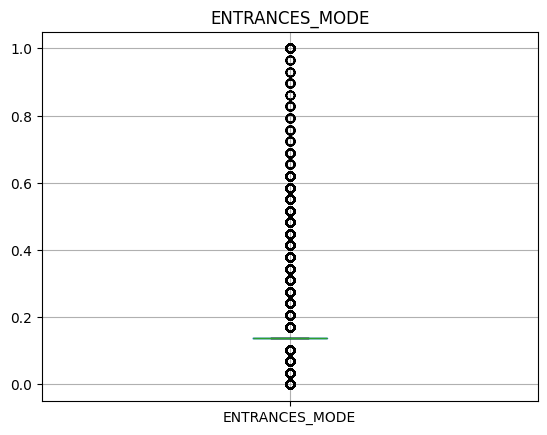

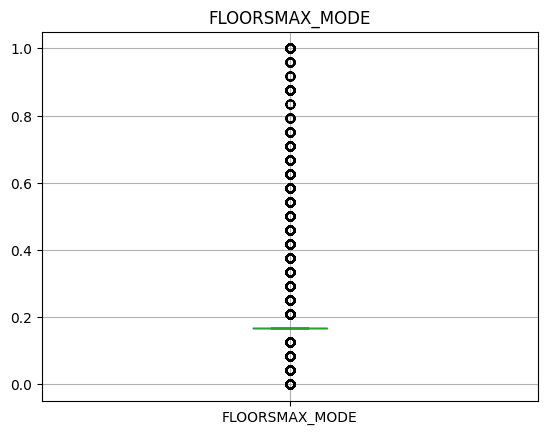

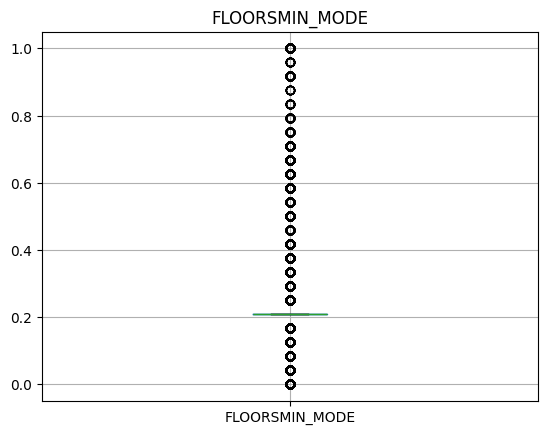

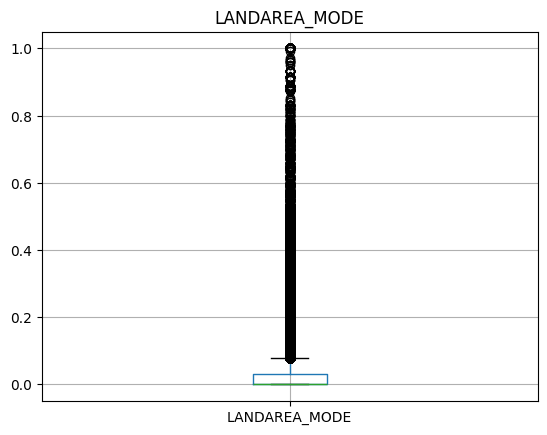

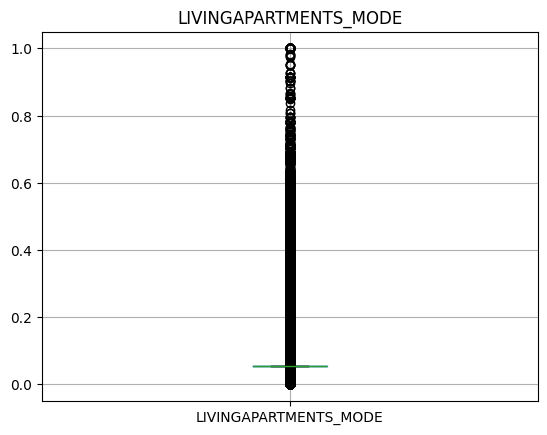

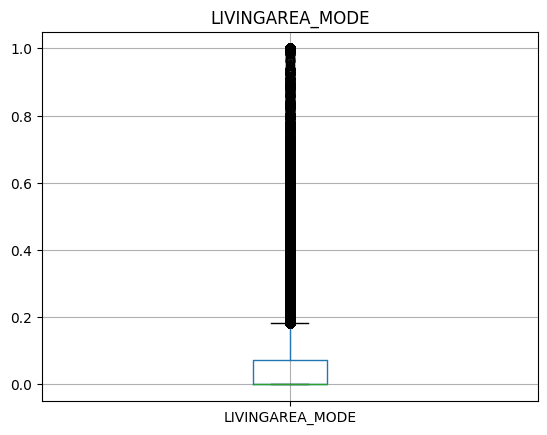

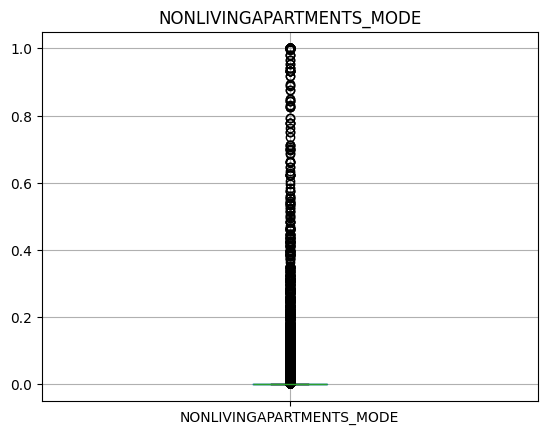

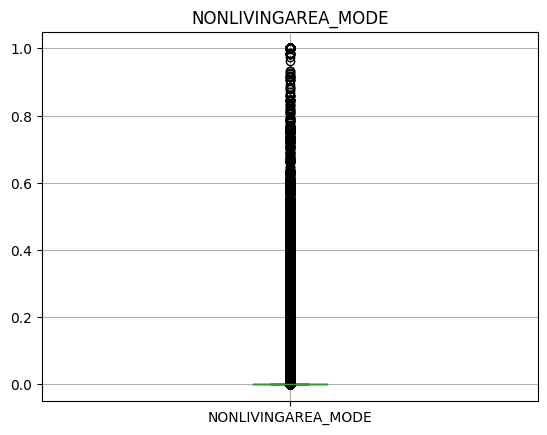

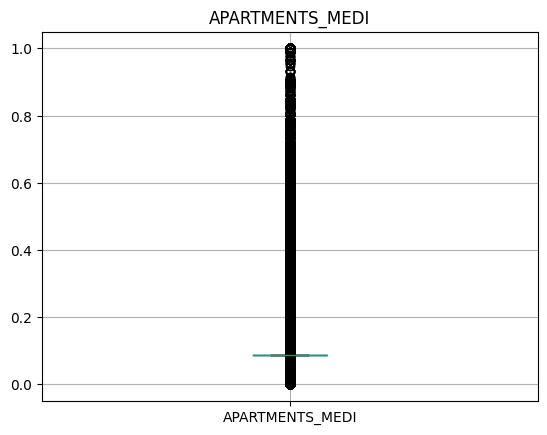

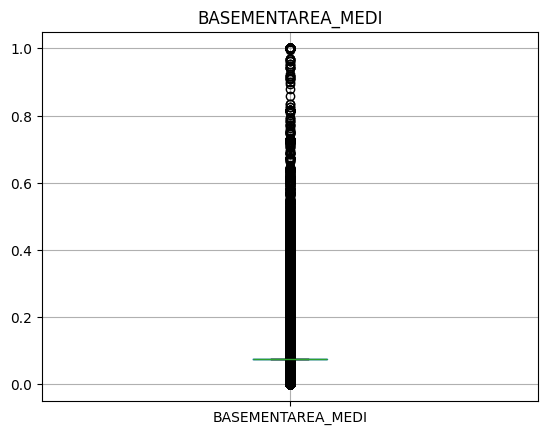

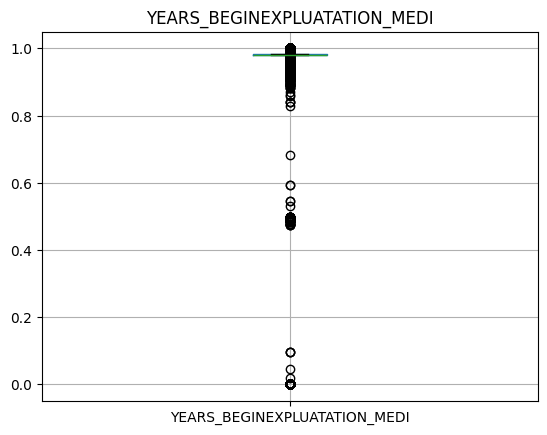

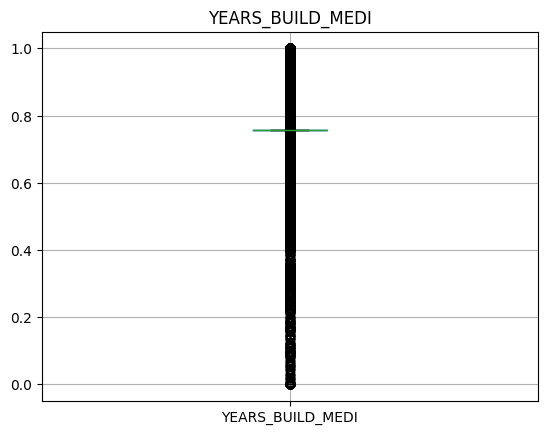

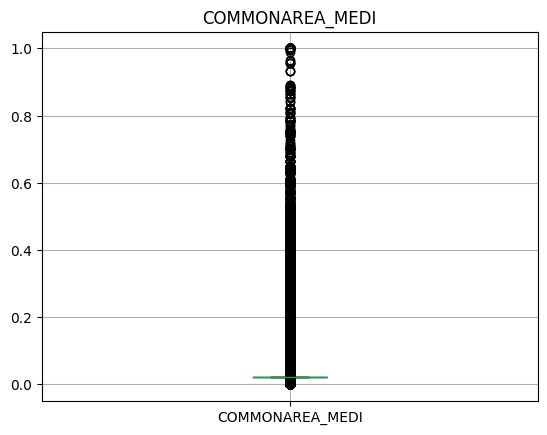

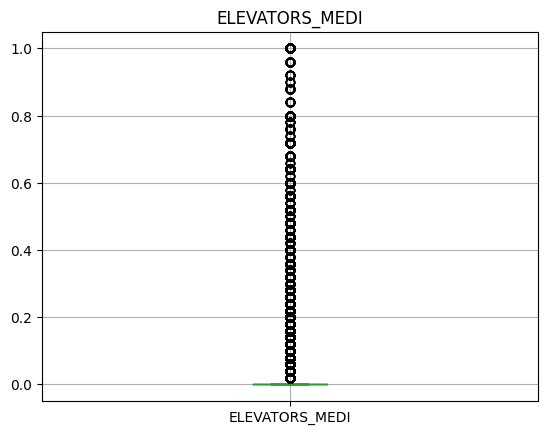

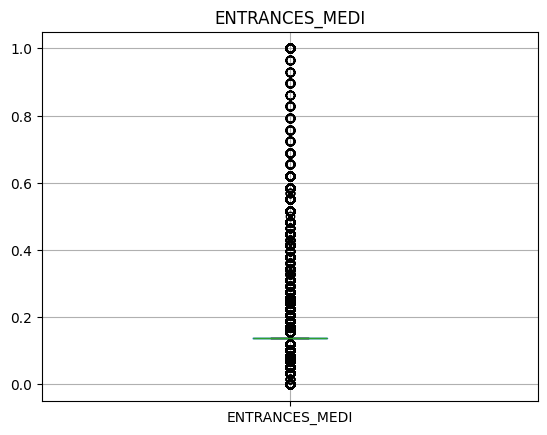

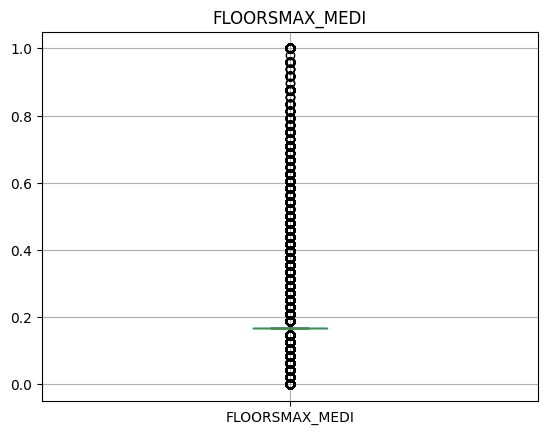

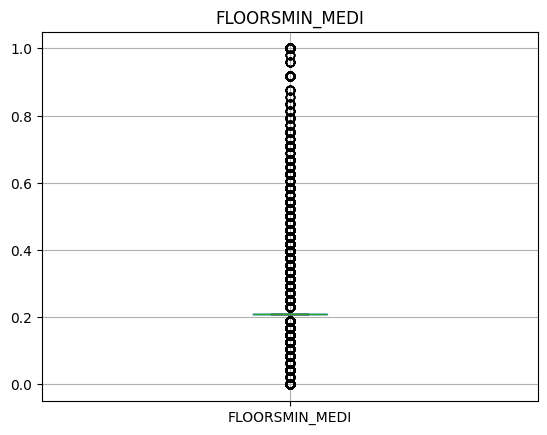

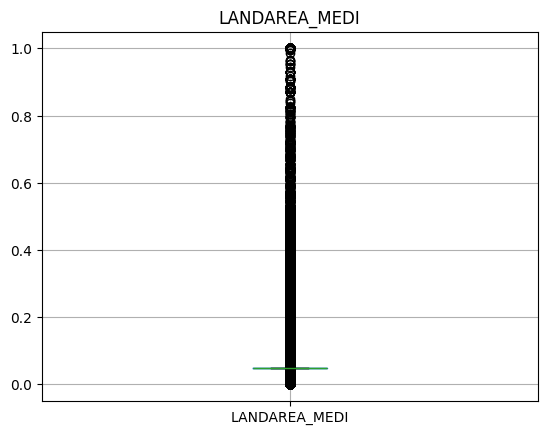

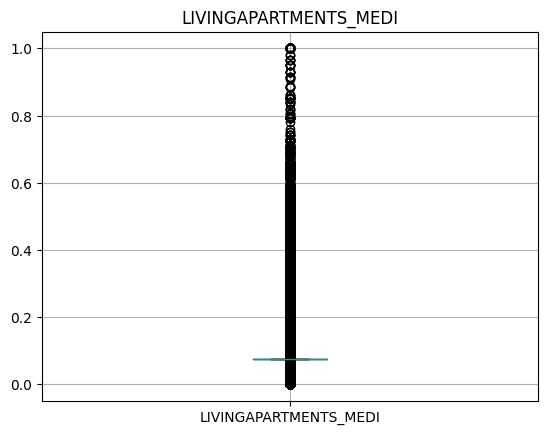

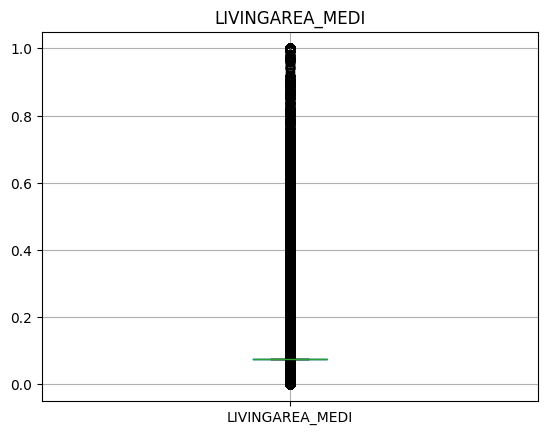

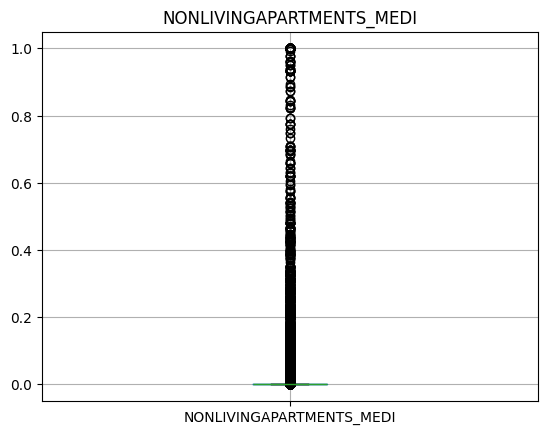

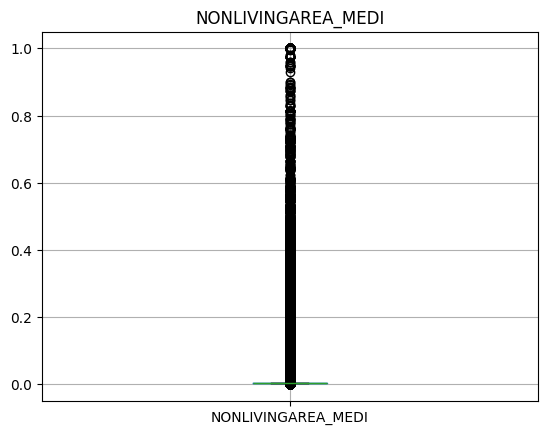

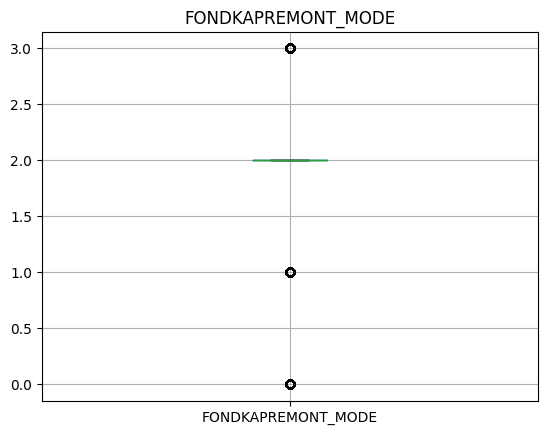

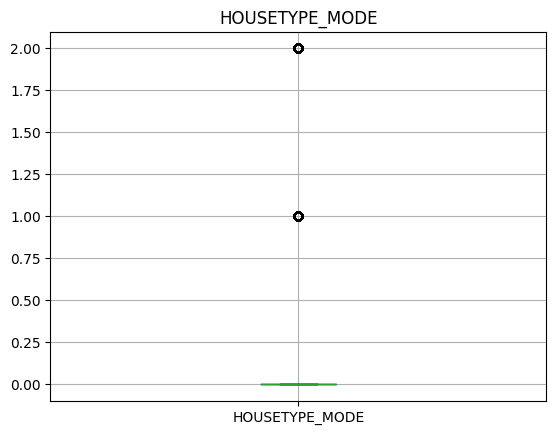

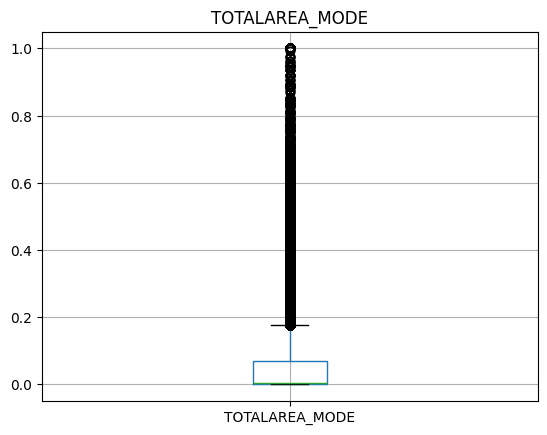

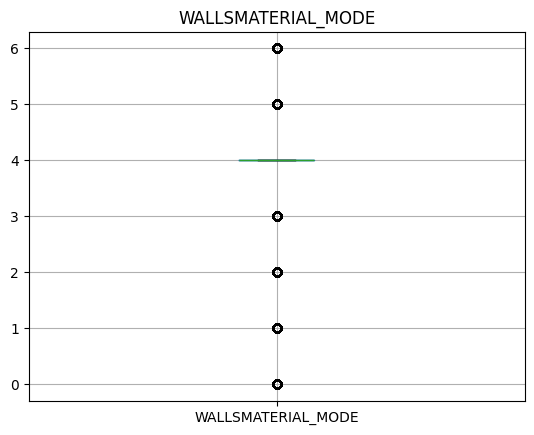

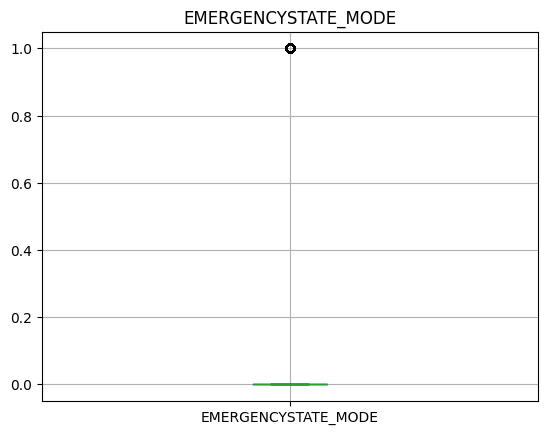

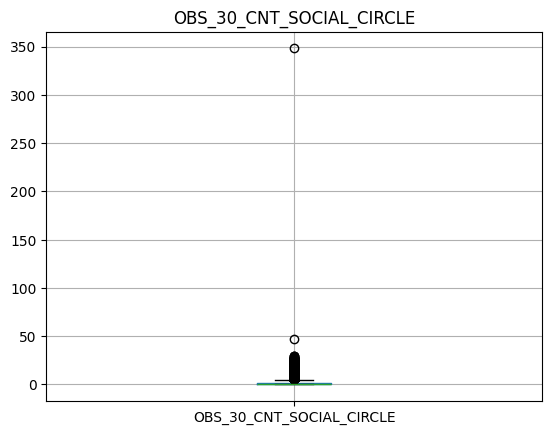

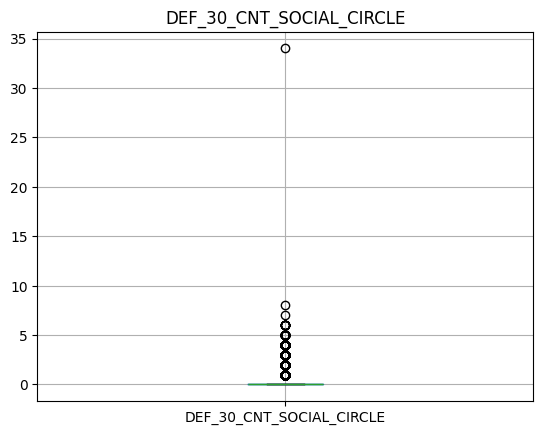

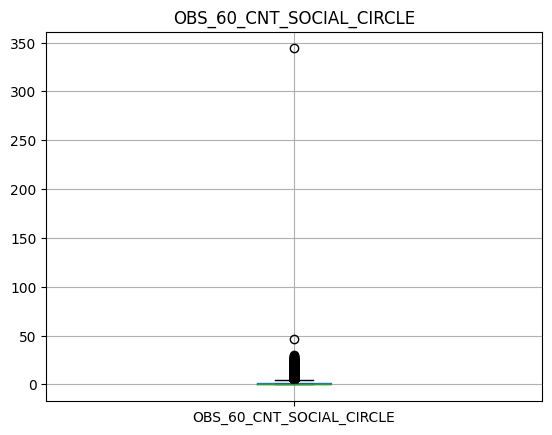

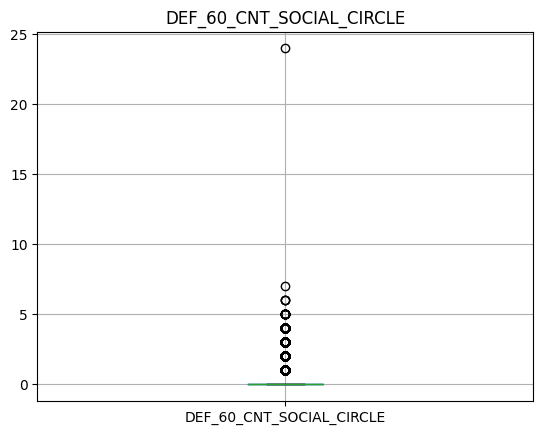

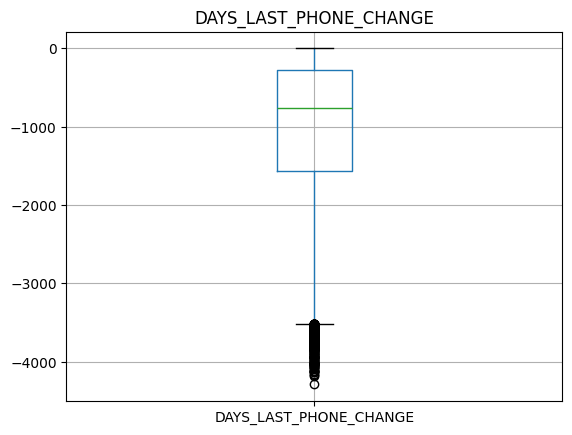

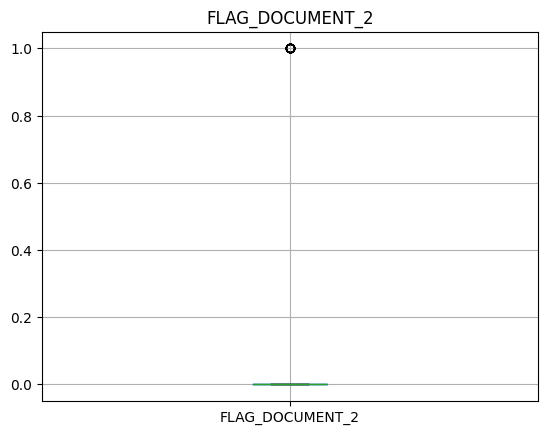

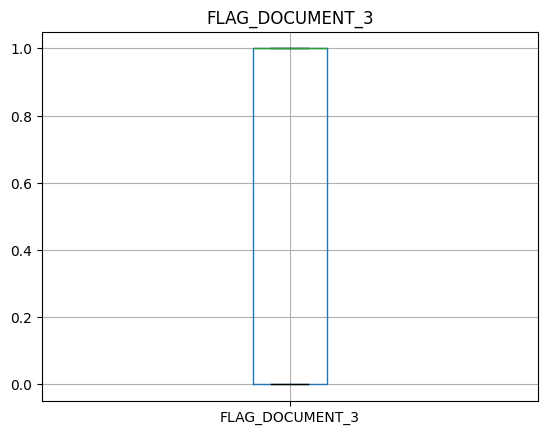

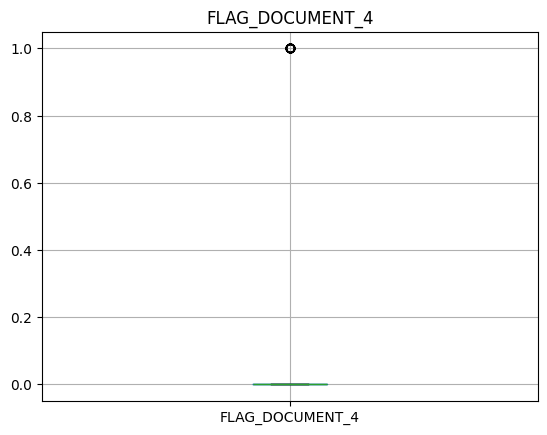

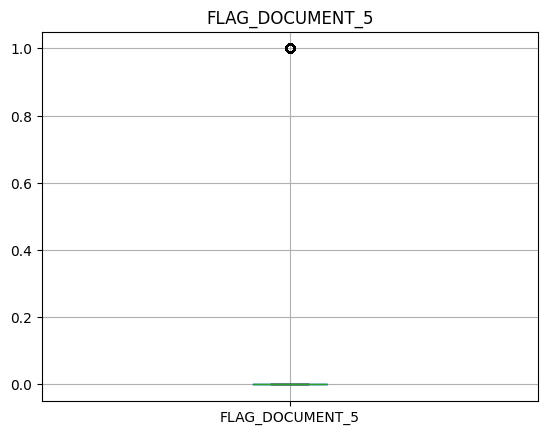

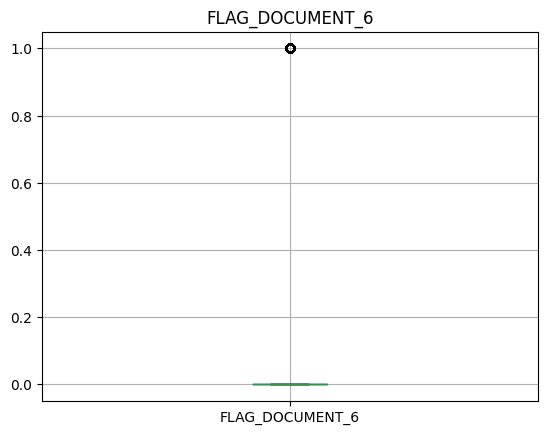

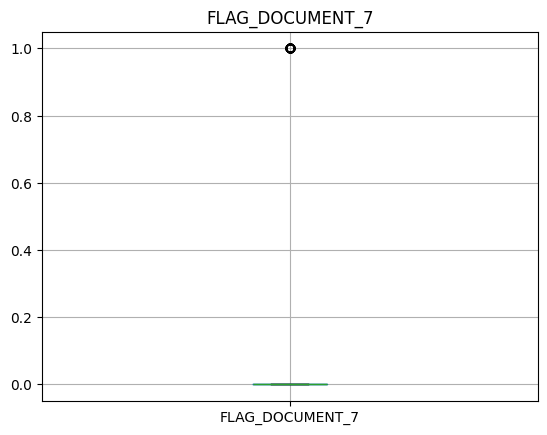

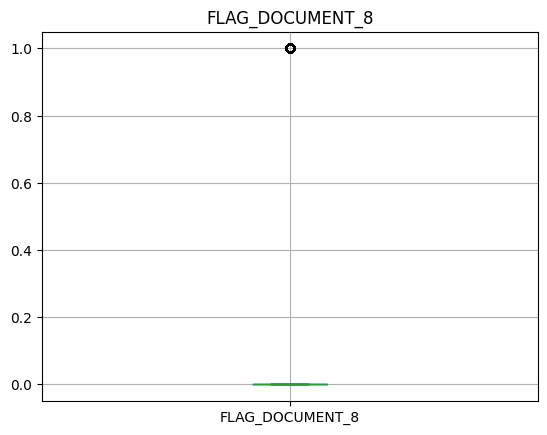

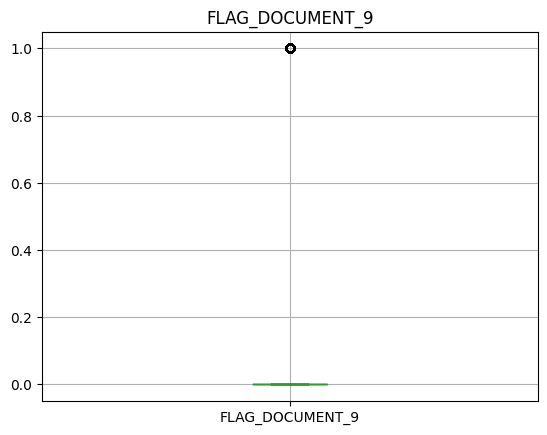

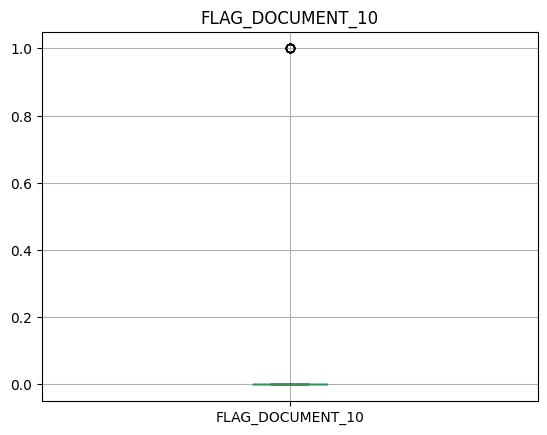

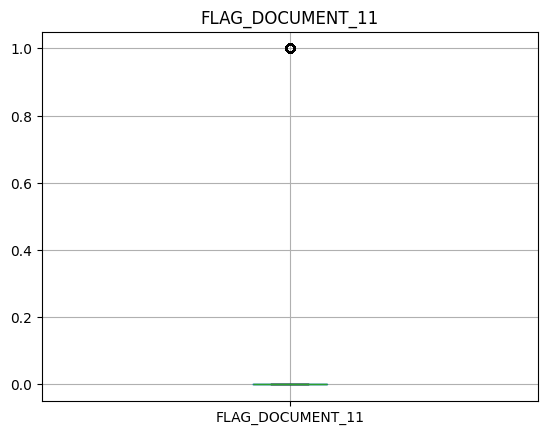

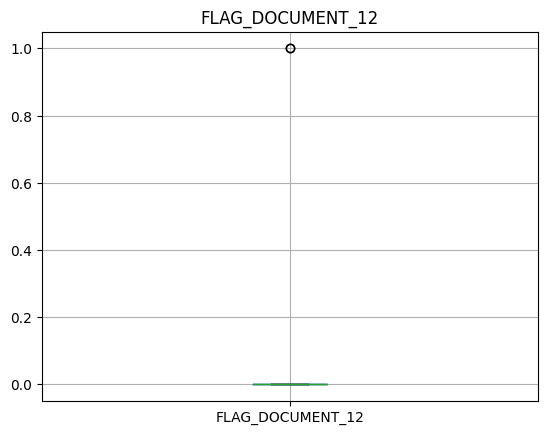

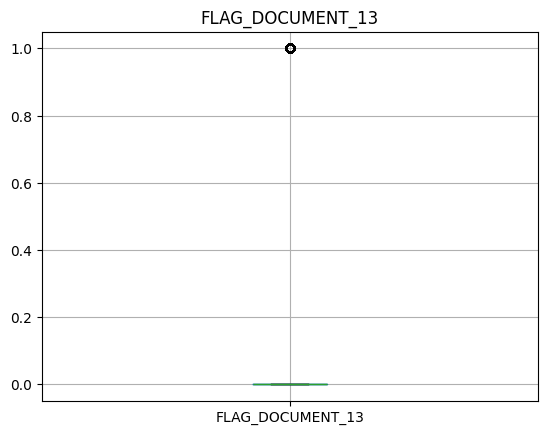

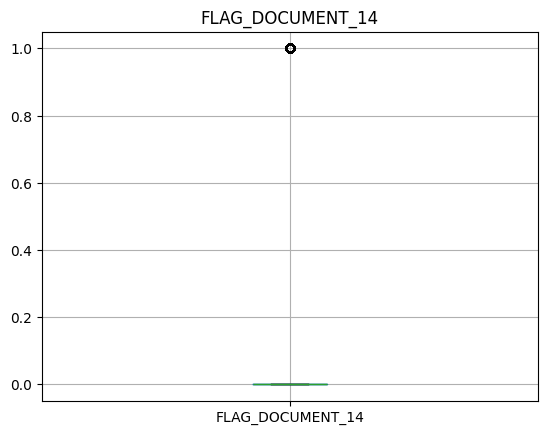

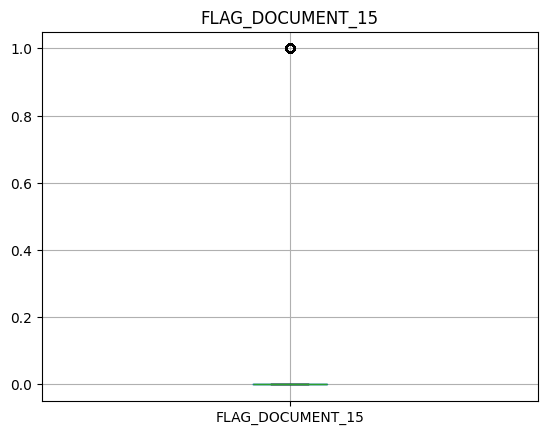

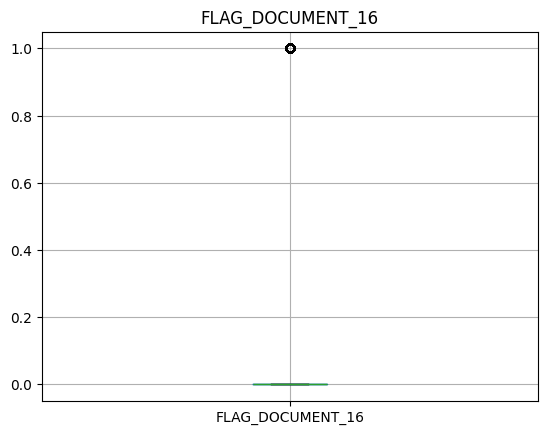

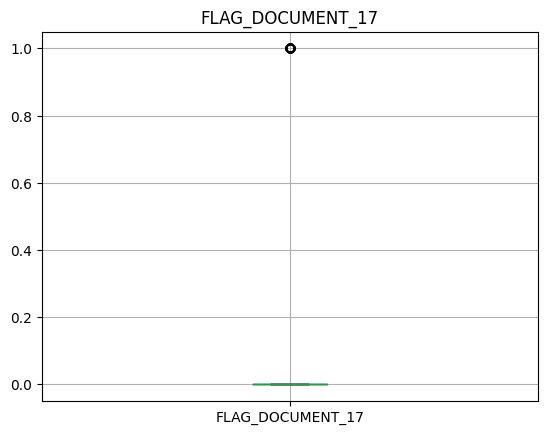

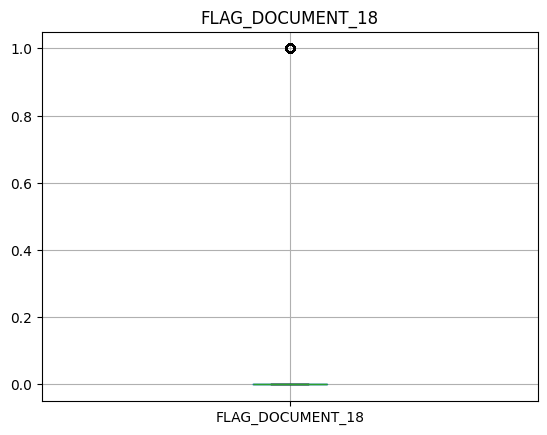

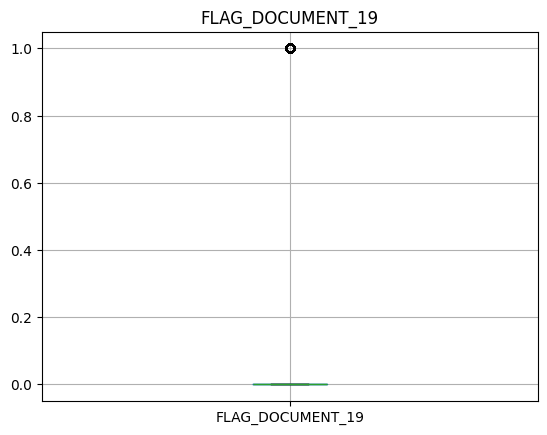

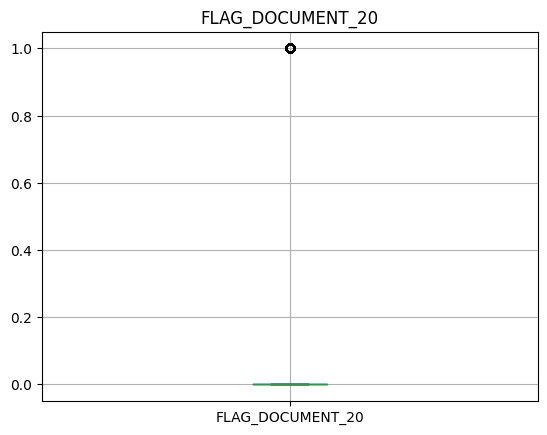

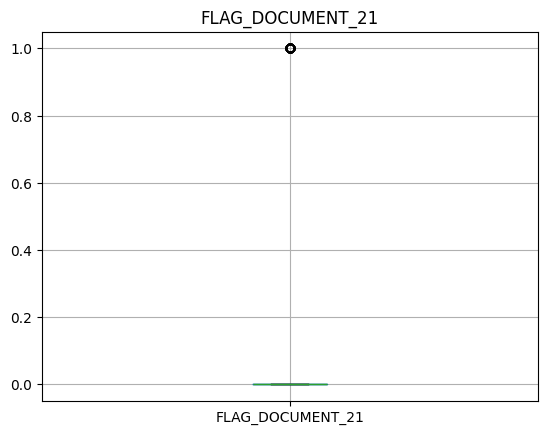

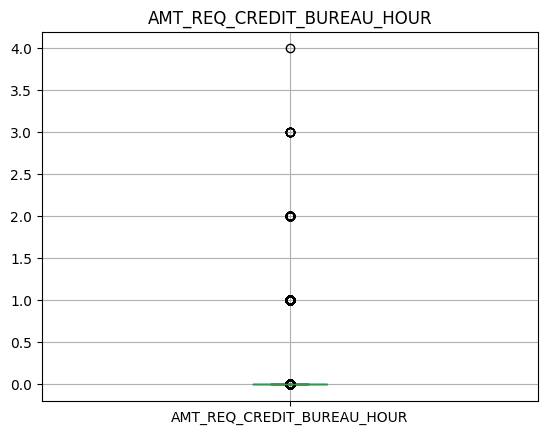

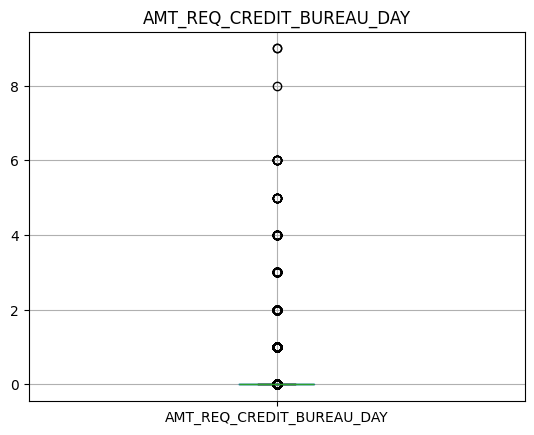

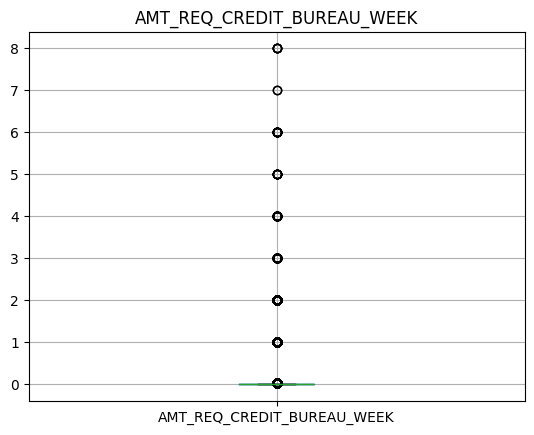

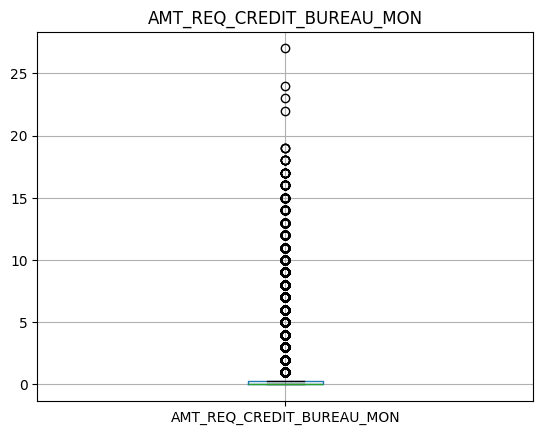

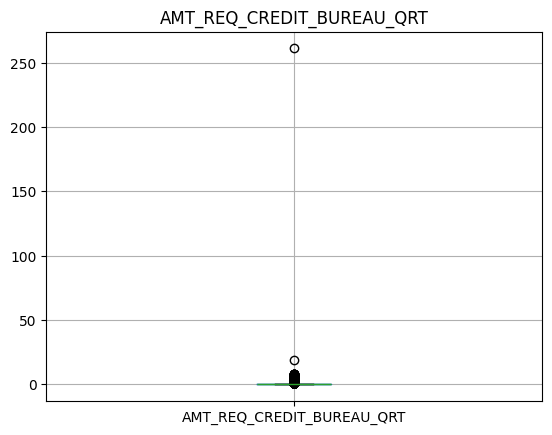

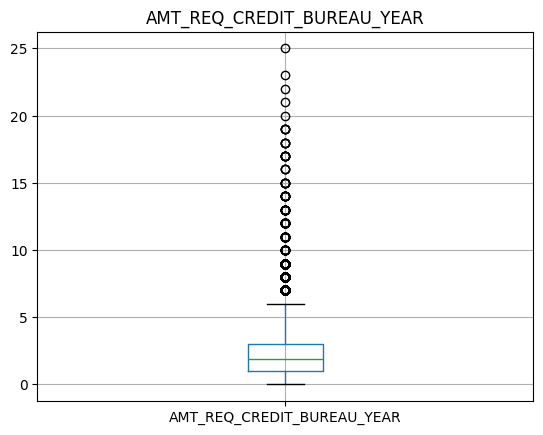

In [11]:
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure()
    df.boxplot(column)
    plt.title(column)
    plt.show()

In [12]:
df['GOODS_PRICE_TO_INCOME_RATIO'] = df['AMT_GOODS_PRICE'] / df['AMT_INCOME_TOTAL']
df['CREDIT_TO_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
df['CREDIT_TO_GOODS_PRICE_RATIO'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
df['ANNUITY_TO_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']

In [13]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [14]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_val = scaler.transform(X_val)

In [15]:
rus = RandomUnderSampler(random_state=42)  # Or other undersampling methods
X_rustrain, y_rustrain = rus.fit_resample(X_train, y_train)

In [16]:
ros = RandomOverSampler(random_state=42)  # Or other oversampling methods
X_rostrain, y_rostrain = ros.fit_resample(X_train, y_train)

In [51]:
lr = LogisticRegression(max_iter=100000, n_jobs=-1, class_weight={1:3, 0:1})

In [52]:
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     25491
           1       0.31      0.16      0.21      2185

    accuracy                           0.91     27676
   macro avg       0.62      0.56      0.58     27676
weighted avg       0.88      0.91      0.89     27676

[[24698   793]
 [ 1834   351]]


In [54]:
lr.fit(X_rostrain, y_rostrain)
y_rospred = lr.predict(X_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     25491
           1       0.31      0.16      0.21      2185

    accuracy                           0.91     27676
   macro avg       0.62      0.56      0.58     27676
weighted avg       0.88      0.91      0.89     27676

[[24698   793]
 [ 1834   351]]


In [56]:
lr.fit(X_rustrain, y_rustrain)
y_ruspred = lr.predict(X_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     25491
           1       0.31      0.16      0.21      2185

    accuracy                           0.91     27676
   macro avg       0.62      0.56      0.58     27676
weighted avg       0.88      0.91      0.89     27676

[[24698   793]
 [ 1834   351]]


In [57]:
dtn = DecisionTreeClassifier()
dtn.fit(X_train, y_train)
y_pred = dtn.predict(X_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     25491
           1       0.14      0.17      0.16      2185

    accuracy                           0.85     27676
   macro avg       0.54      0.54      0.54     27676
weighted avg       0.87      0.85      0.86     27676

[[23237  2254]
 [ 1807   378]]


In [58]:
dto = DecisionTreeClassifier()
dto.fit(X_rostrain, y_rostrain)
y_dtrospred = dto.predict(X_val)
print(classification_report(y_val, y_dtrospred))
print(confusion_matrix(y_val, y_dtrospred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     25491
           1       0.14      0.15      0.15      2185

    accuracy                           0.86     27676
   macro avg       0.53      0.54      0.53     27676
weighted avg       0.86      0.86      0.86     27676

[[23479  2012]
 [ 1855   330]]


In [59]:
dtu = DecisionTreeClassifier()
dtu.fit(X_rustrain, y_rustrain)
y_pred = dtu.predict(X_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.59      0.72     25491
           1       0.11      0.58      0.18      2185

    accuracy                           0.59     27676
   macro avg       0.52      0.58      0.45     27676
weighted avg       0.88      0.59      0.68     27676

[[14980 10511]
 [  926  1259]]


In [60]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     25491
           1       0.15      0.17      0.16      2185

    accuracy                           0.86     27676
   macro avg       0.54      0.54      0.54     27676
weighted avg       0.87      0.86      0.86     27676

[[23386  2105]
 [ 1822   363]]


In [61]:
clfo = tree.DecisionTreeClassifier(criterion = 'entropy')
clfo.fit(X_rostrain, y_rostrain)
y_clfrospred = clfo.predict(X_val)
print(classification_report(y_val, y_clfrospred))
print(confusion_matrix(y_val, y_clfrospred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     25491
           1       0.14      0.16      0.15      2185

    accuracy                           0.86     27676
   macro avg       0.54      0.54      0.54     27676
weighted avg       0.87      0.86      0.86     27676

[[23397  2094]
 [ 1832   353]]


In [62]:
clfu = tree.DecisionTreeClassifier(criterion = 'entropy')
clfu.fit(X_rustrain, y_rustrain)
y_clfruspred = clfu.predict(X_val)
print(classification_report(y_val, y_clfruspred))
print(confusion_matrix(y_val, y_clfruspred))

              precision    recall  f1-score   support

           0       0.94      0.59      0.72     25491
           1       0.11      0.57      0.18      2185

    accuracy                           0.59     27676
   macro avg       0.52      0.58      0.45     27676
weighted avg       0.88      0.59      0.68     27676

[[15026 10465]
 [  936  1249]]


In [63]:
clf_gini = tree.DecisionTreeClassifier(criterion = 'gini')
clf_gini.fit(X_train, y_train)
y_clf_ginipred = clf_gini.predict(X_val)
print(classification_report(y_val, y_clf_ginipred))
print(confusion_matrix(y_val, y_clf_ginipred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     25491
           1       0.14      0.17      0.15      2185

    accuracy                           0.85     27676
   macro avg       0.53      0.54      0.54     27676
weighted avg       0.87      0.85      0.86     27676

[[23254  2237]
 [ 1824   361]]


In [64]:
clfo_gini = tree.DecisionTreeClassifier(criterion = 'gini')
clfo_gini.fit(X_rostrain, y_rostrain)
y_clfo_ginipred = clf_gini.predict(X_val)
print(classification_report(y_val, y_clfo_ginipred))
print(confusion_matrix(y_val, y_clfo_ginipred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92     25491
           1       0.14      0.17      0.15      2185

    accuracy                           0.85     27676
   macro avg       0.53      0.54      0.54     27676
weighted avg       0.87      0.85      0.86     27676

[[23254  2237]
 [ 1824   361]]


In [65]:
clfu_gini = tree.DecisionTreeClassifier(criterion = 'gini')
clfu_gini.fit(X_rustrain, y_rustrain)
y_clfu_ginipred = clfu_gini.predict(X_val)
print(classification_report(y_val, y_clfu_ginipred))
print(confusion_matrix(y_val,y_clfu_ginipred))

              precision    recall  f1-score   support

           0       0.94      0.58      0.72     25491
           1       0.11      0.58      0.18      2185

    accuracy                           0.58     27676
   macro avg       0.52      0.58      0.45     27676
weighted avg       0.88      0.58      0.68     27676

[[14895 10596]
 [  917  1268]]


In [66]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=11)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     25491
           1       0.00      0.00      0.00      2185

    accuracy                           0.92     27676
   macro avg       0.46      0.50      0.48     27676
weighted avg       0.85      0.92      0.88     27676

[[25491     0]
 [ 2185     0]]


c:\Users\zizot\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zizot\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zizot\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
rfo = RandomForestClassifier(n_estimators=100)
rfo.fit(X_rostrain, y_rostrain)
y_opred = rf.predict(X_val)
print(classification_report(y_val, y_opred))
print(confusion_matrix(y_val, y_opred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     25491
           1       0.00      0.00      0.00      2185

    accuracy                           0.92     27676
   macro avg       0.46      0.50      0.48     27676
weighted avg       0.85      0.92      0.88     27676

[[25491     0]
 [ 2185     0]]


c:\Users\zizot\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zizot\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zizot\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
rfu = RandomForestClassifier(n_estimators=100)
rfu.fit(X_rustrain, y_rustrain)
y_upred = rf.predict(X_val)
print(classification_report(y_val, y_opred))
print(confusion_matrix(y_val, y_upred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     25491
           1       0.00      0.00      0.00      2185

    accuracy                           0.92     27676
   macro avg       0.46      0.50      0.48     27676
weighted avg       0.85      0.92      0.88     27676

[[25491     0]
 [ 2185     0]]


c:\Users\zizot\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zizot\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\zizot\anaconda32\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
xgb = XGBClassifier(n_estimators=1000, n_jobs=-1, learning_rate=0.1, random_state=42, class_weight={1:10, 0:1}, eval_metric='auc', max_depth=100)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

c:\Users\zizot\anaconda32\lib\site-packages\xgboost\core.py:160: UserWarning: [21:55:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     25491
           1       0.46      0.02      0.05      2185

    accuracy                           0.92     27676
   macro avg       0.69      0.51      0.50     27676
weighted avg       0.89      0.92      0.89     27676

[[25427    64]
 [ 2131    54]]


In [70]:
# params = {'max_depth':[3,5,7,9,11,'max'], 'n_estimators': [100,300,500,1000]}
# from sklearn.model_selection import GridSearchCV
# grid = GridSearchCV(
#              estimator=rf,
#              param_grid=params,
#              scoring = 'roc_auc',
#              n_jobs = 10,
#              cv = 10 
#             )

In [71]:
# grid.fit(X_train,y_train)

In [72]:
# print("Best score: ", grid.best_score_)
# print("Best parameters: ", grid.best_params_)

In [73]:
svm = SVC()
svm.fit(X_rustrain, y_rustrain)
y_pred = svm.predict(X_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79     25491
           1       0.15      0.67      0.24      2185

    accuracy                           0.67     27676
   macro avg       0.55      0.67      0.52     27676
weighted avg       0.90      0.67      0.75     27676

[[17067  8424]
 [  715  1470]]


In [17]:
# naive bayes
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
nb.fit(X_rustrain, y_rustrain)
y_pred = nb.predict(X_val)
print(classification_report(y_val, y_pred))
print(confusion_matrix(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.51      0.66     25491
           1       0.11      0.69      0.18      2185

    accuracy                           0.52     27676
   macro avg       0.53      0.60      0.42     27676
weighted avg       0.88      0.52      0.62     27676

[[12967 12524]
 [  688  1497]]


In [ ]:
# Define model layers
model = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')
model.fit(x = X_train,y = y_train, epochs=10, validation_data=(X_val, y_val))
y_preddeep = model.predict(X_test)
threshold = 0.5  # Adjust as needed
y_predtest = tf.where(y_preddeep > threshold, 1, 0)

In [ ]:
print(classification_report(y_test, y_predtest))
print(confusion_matrix(y_test, y_predtest))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     28233
           1       0.00      0.00      0.00      2519

    accuracy                           0.92     30752
   macro avg       0.46      0.50      0.48     30752
weighted avg       0.84      0.92      0.88     30752

[[28233     0]
 [ 2519     0]]


c:\Users\a_rah\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\a_rah\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\a_rah\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Define model layers
model = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')
model.fit(x = X_rustrain,y = y_rustrain, epochs=10, validation_data=(X_val, y_val))
y_preddeep = model.predict(X_test)
threshold = 0.5  # Adjust as needed
y_predtest = tf.where(y_preddeep > threshold, 1, 0)
print(classification_report(y_test, y_predtest))
print(confusion_matrix(y_test, y_predtest))

Epoch 1/10
1258/1258 [==============================] - 35s 27ms/step - loss: 677.1428 - accuracy: 0.5210 - val_loss: 84.0529 - val_accuracy: 0.7371
Epoch 2/10
1258/1258 [==============================] - 7s 6ms/step - loss: 353.1802 - accuracy: 0.5274 - val_loss: 77.2992 - val_accuracy: 0.6032
Epoch 3/10
1258/1258 [==============================] - 8s 6ms/step - loss: 269.5547 - accuracy: 0.5288 - val_loss: 714.6392 - val_accuracy: 0.0848
Epoch 4/10
1258/1258 [==============================] - 8s 6ms/step - loss: 252.8581 - accuracy: 0.5218 - val_loss: 72.2779 - val_accuracy: 0.9052
Epoch 5/10
1258/1258 [==============================] - 7s 6ms/step - loss: 184.2619 - accuracy: 0.5214 - val_loss: 118.9323 - val_accuracy: 0.4734
Epoch 6/10
1258/1258 [==============================] - 7s 6ms/step - loss: 187.9896 - accuracy: 0.5237 - val_loss: 48.1243 - val_accuracy: 0.9114
Epoch 7/10
1258/1258 [==============================] - 7s 6ms/step - loss: 151.0397 - accuracy: 0.5226 - val_loss

In [ ]:
# Define model layers
model = tf.keras.Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')
model.fit(x = X_rostrain,y = y_rostrain, epochs=10, validation_data=(X_val, y_val))
y_preddeep = model.predict(X_test)
threshold = 0.5  # Adjust as needed
y_predtest = tf.where(y_preddeep > threshold, 1, 0)
print(classification_report(y_test, y_predtest))
print(confusion_matrix(y_test, y_predtest))

Epoch 1/10
14311/14311 [==============================] - 96s 7ms/step - loss: 127.1908 - accuracy: 0.5328 - val_loss: 1.4001 - val_accuracy: 0.0949
Epoch 2/10
14311/14311 [==============================] - 68s 5ms/step - loss: 0.6906 - accuracy: 0.5285 - val_loss: 0.6888 - val_accuracy: 0.9211
Epoch 3/10
14311/14311 [==============================] - 67s 5ms/step - loss: 0.7095 - accuracy: 0.5004 - val_loss: 0.6905 - val_accuracy: 0.9211
Epoch 4/10
14311/14311 [==============================] - 69s 5ms/step - loss: 0.6932 - accuracy: 0.4994 - val_loss: 0.6854 - val_accuracy: 0.9211
Epoch 5/10
14311/14311 [==============================] - 70s 5ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6905 - val_accuracy: 0.9211
Epoch 6/10
14311/14311 [==============================] - 69s 5ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss: 0.6931 - val_accuracy: 0.9211
Epoch 7/10
14311/14311 [==============================] - 68s 5ms/step - loss: 0.6932 - accuracy: 0.4995 - val_loss:

c:\Users\a_rah\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\a_rah\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\a_rah\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
